# Basic plotting with ggplot

load needed packages

In [1]:
suppressPackageStartupMessages(library(tidyverse))

## Outline
### 1. Inspecting the data frame
### 2. Simple plots
### 3. Most important arguments/functions to know


## Inspecting the data frame

In [2]:
head(CO2,10)
tail(CO2)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2
7,Qn1,Quebec,nonchilled,1000,39.7
8,Qn2,Quebec,nonchilled,95,13.6
9,Qn2,Quebec,nonchilled,175,27.3


,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
79,Mc3,Mississippi,chilled,175,18.0
80,Mc3,Mississippi,chilled,250,17.9
81,Mc3,Mississippi,chilled,350,17.9
82,Mc3,Mississippi,chilled,500,17.9
83,Mc3,Mississippi,chilled,675,18.9
84,Mc3,Mississippi,chilled,1000,19.9


In [4]:
?CO2

CO2 {datasets},R Documentation


`str()`<br> `is()` <br> `dim()` <br> `colnames()` <br> `summary()`

In [5]:
def_height <- options()$repr.plot.height
def_width <- options()$repr.plot.width
def_res <- options()$repr.plot.res

In [6]:
options(repr.plot.res = 200)

## Simple plots

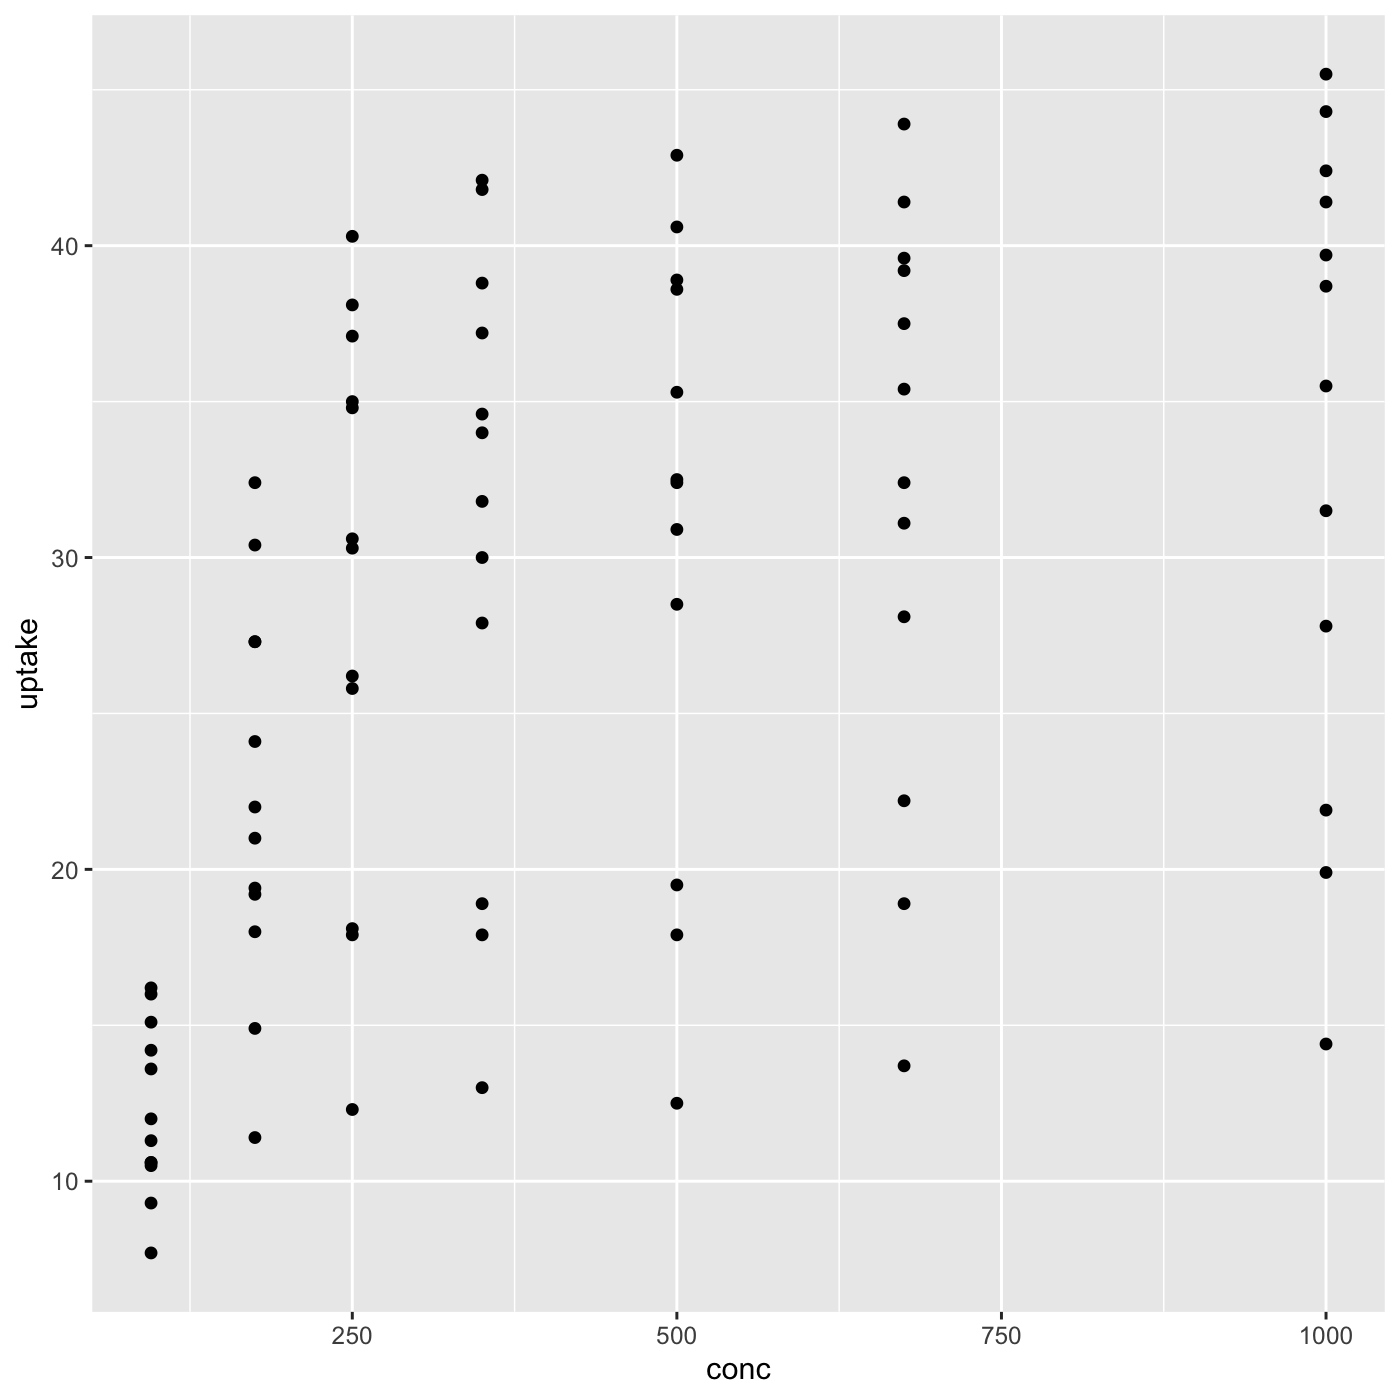

In [7]:
ggplot(data = CO2) +
    geom_point(mapping = aes(x=conc, y=uptake))

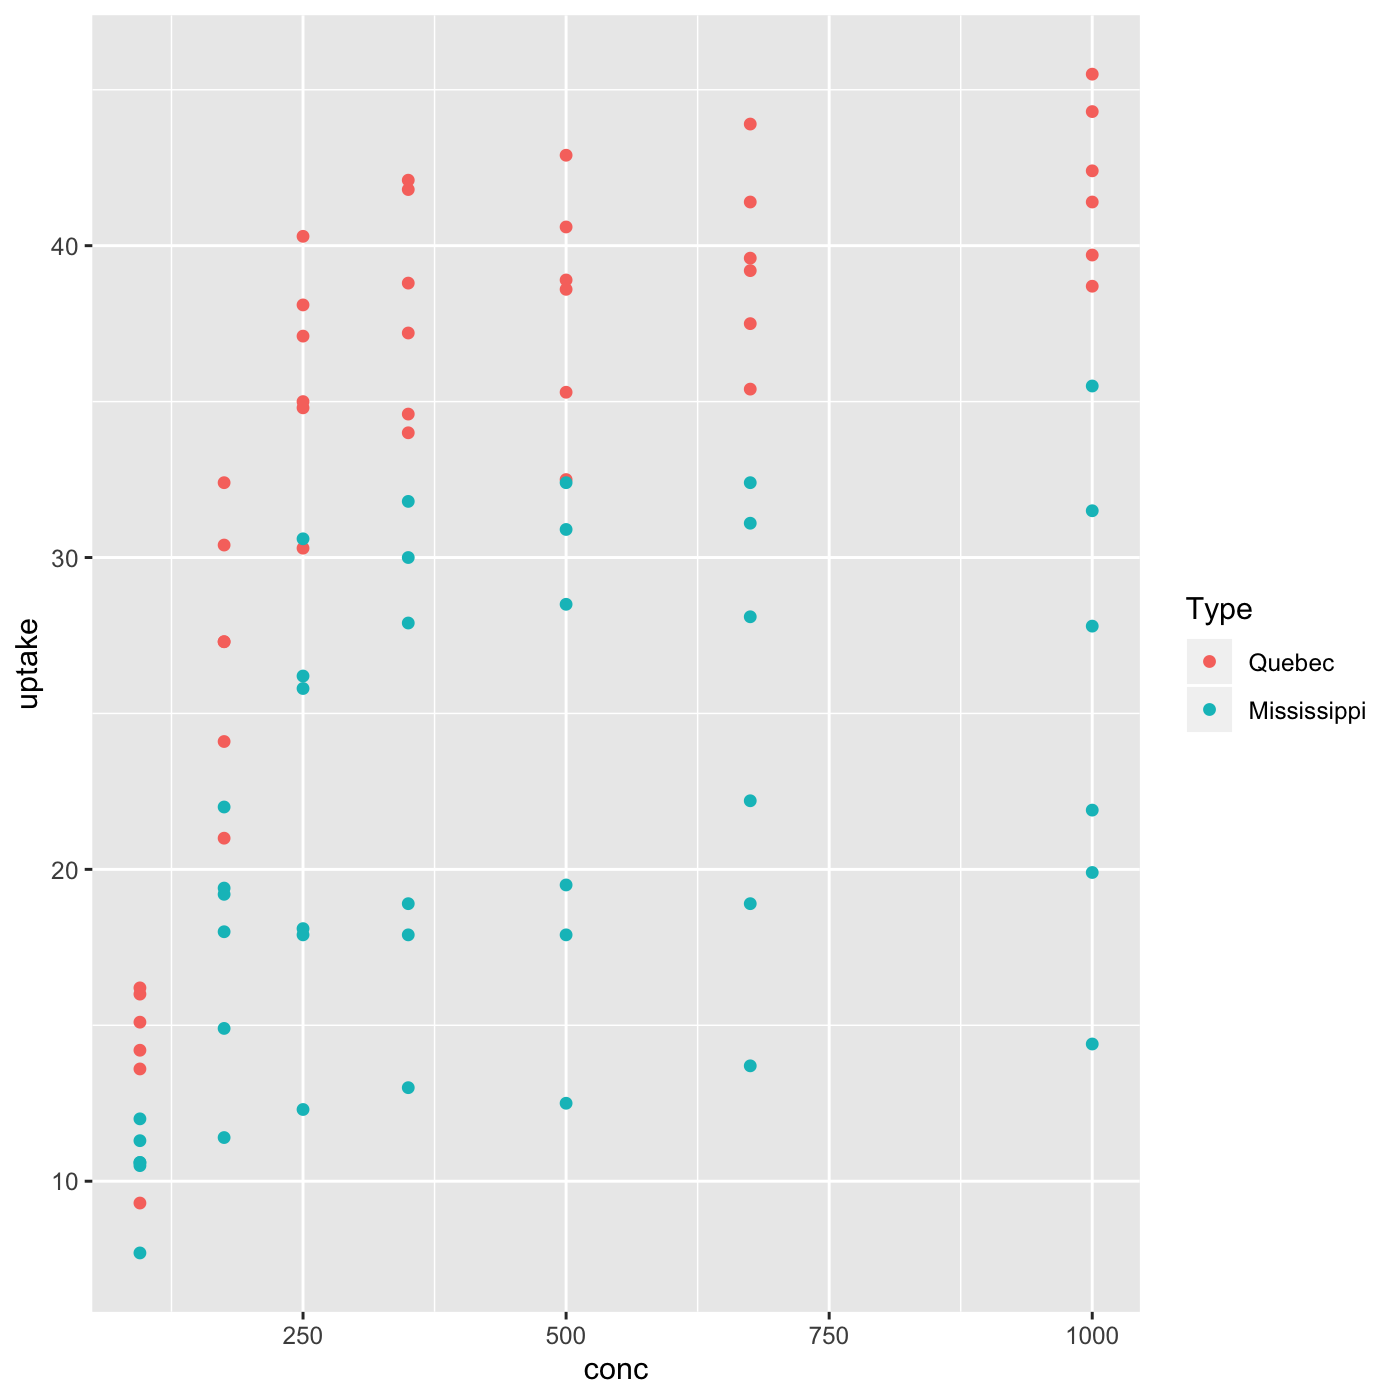

In [8]:
ggplot(data = CO2) +
    geom_point(mapping = aes(x=conc,y=uptake, color=Type))

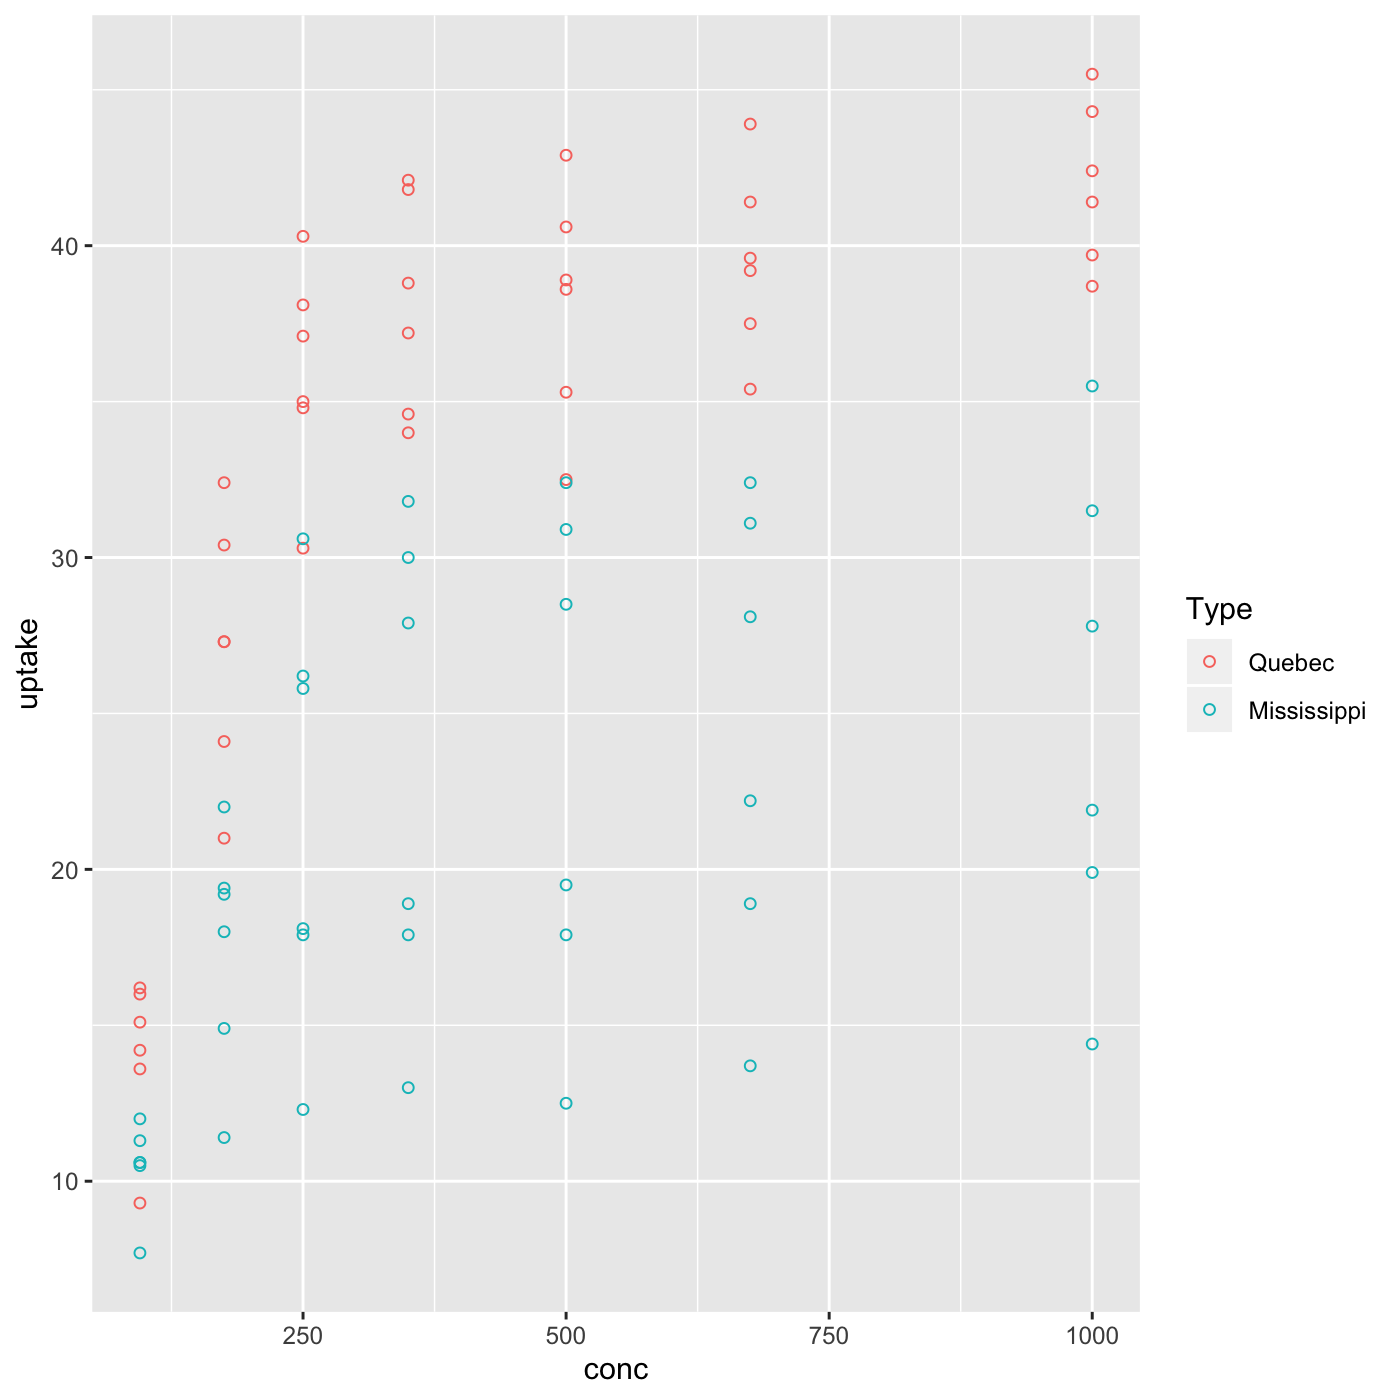

In [9]:
ggplot(data = CO2) +
    geom_point(mapping = aes(x=conc,y=uptake, color=Type), shape=1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



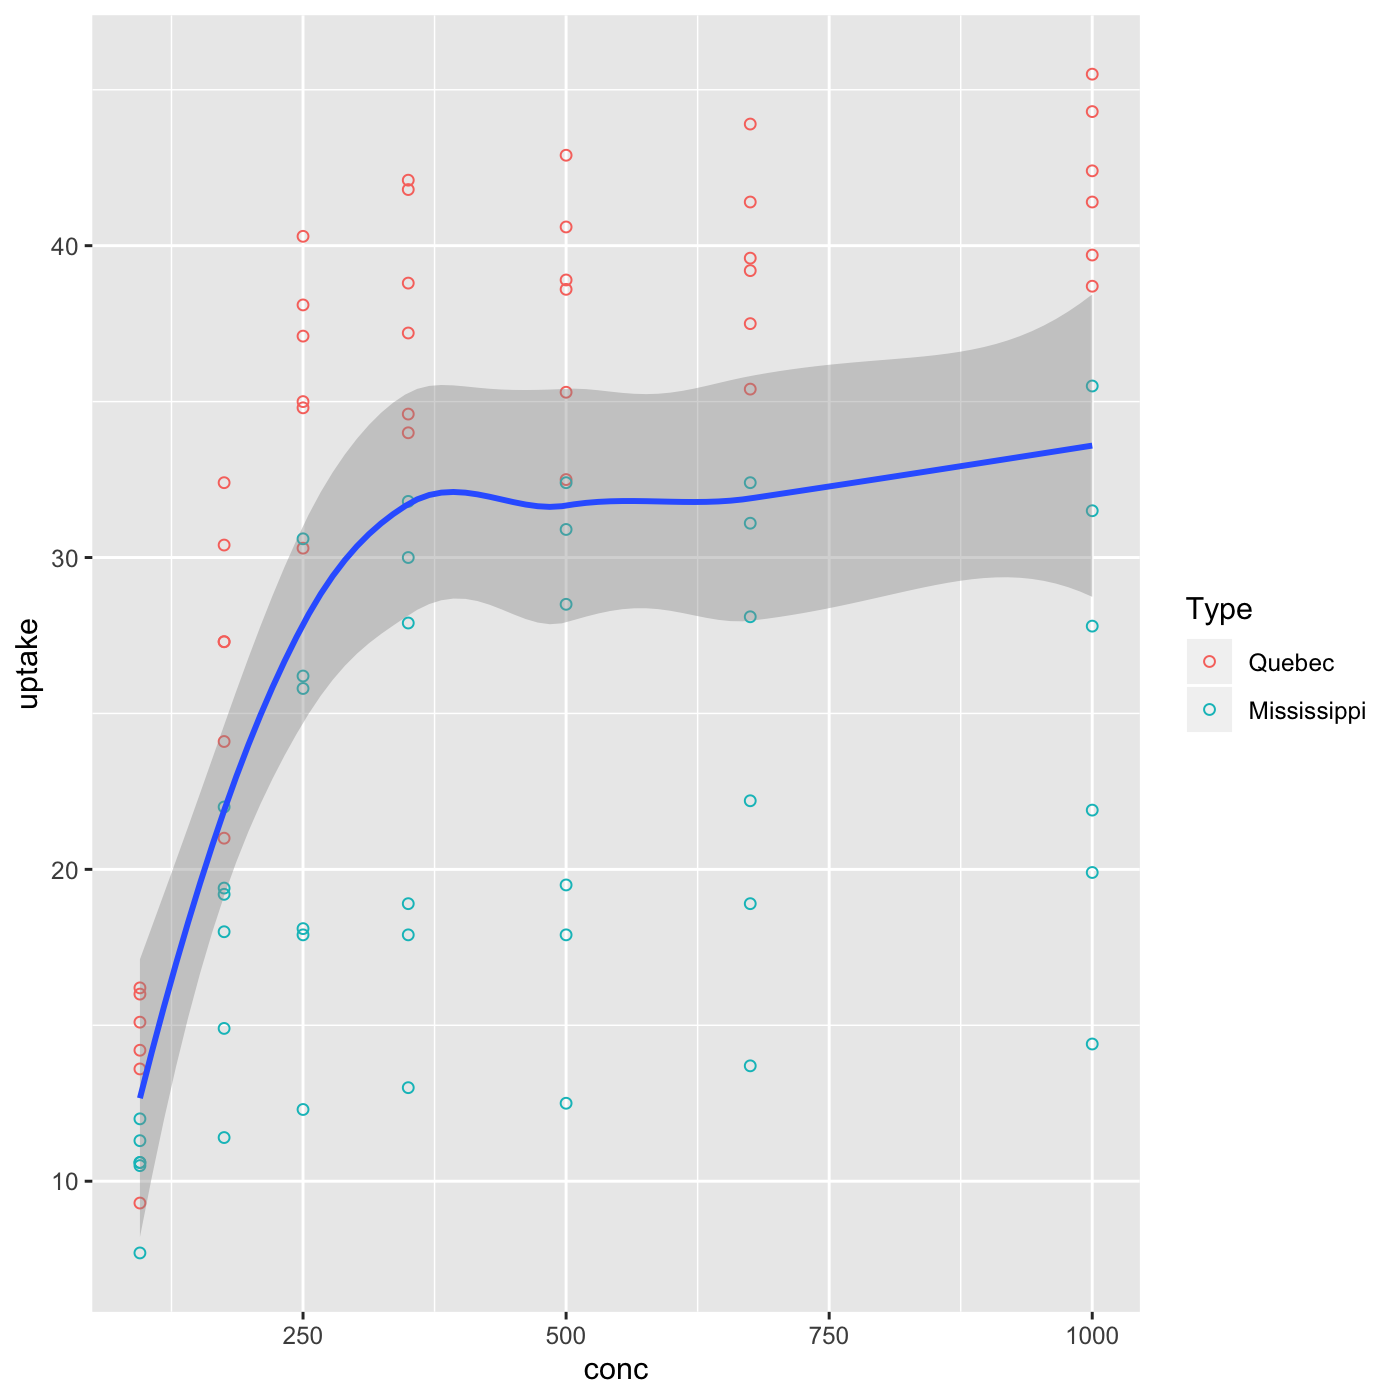

In [10]:
ggplot(data = CO2, mapping = aes(x=conc,y=uptake)) +
    geom_point(mapping = aes(color=Type), shape=1) +
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



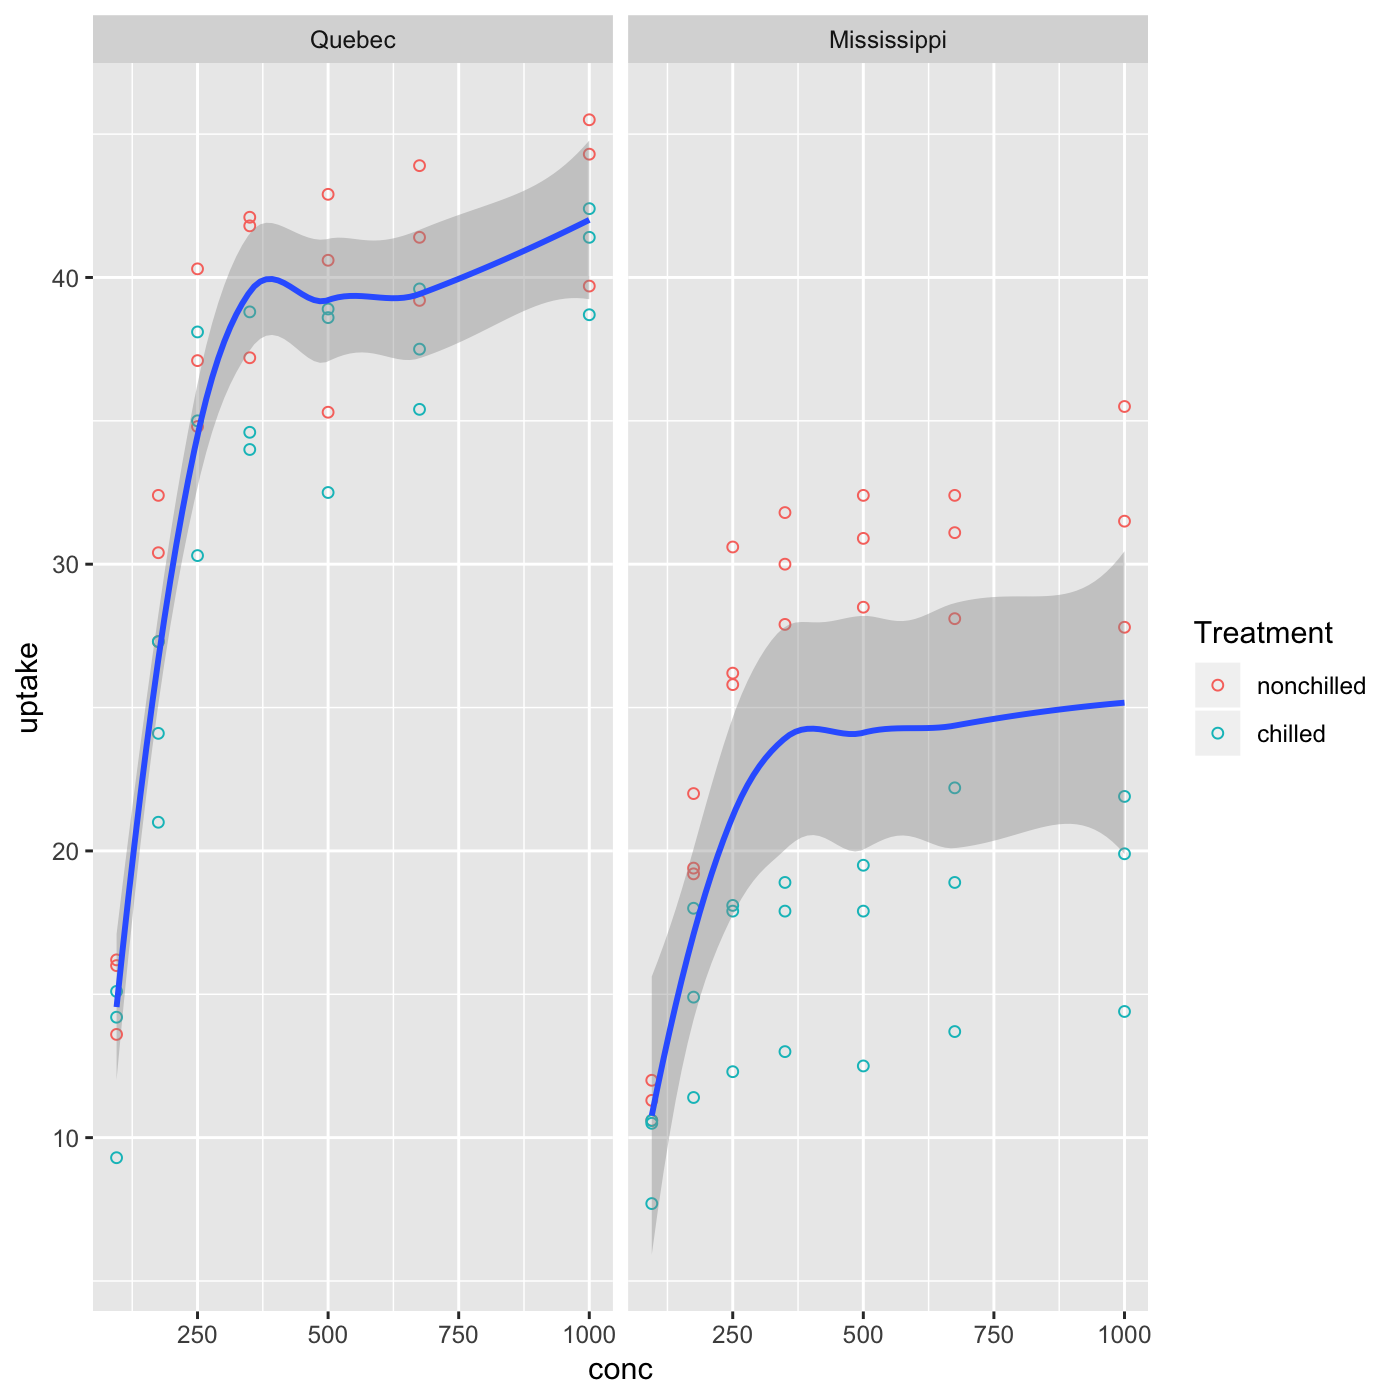

In [11]:
ggplot(data = CO2, mapping = aes(x=conc,y=uptake)) +
    geom_point(mapping = aes(color=Treatment), shape=1) +
    geom_smooth() +
    facet_wrap(~Type, nrow=1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



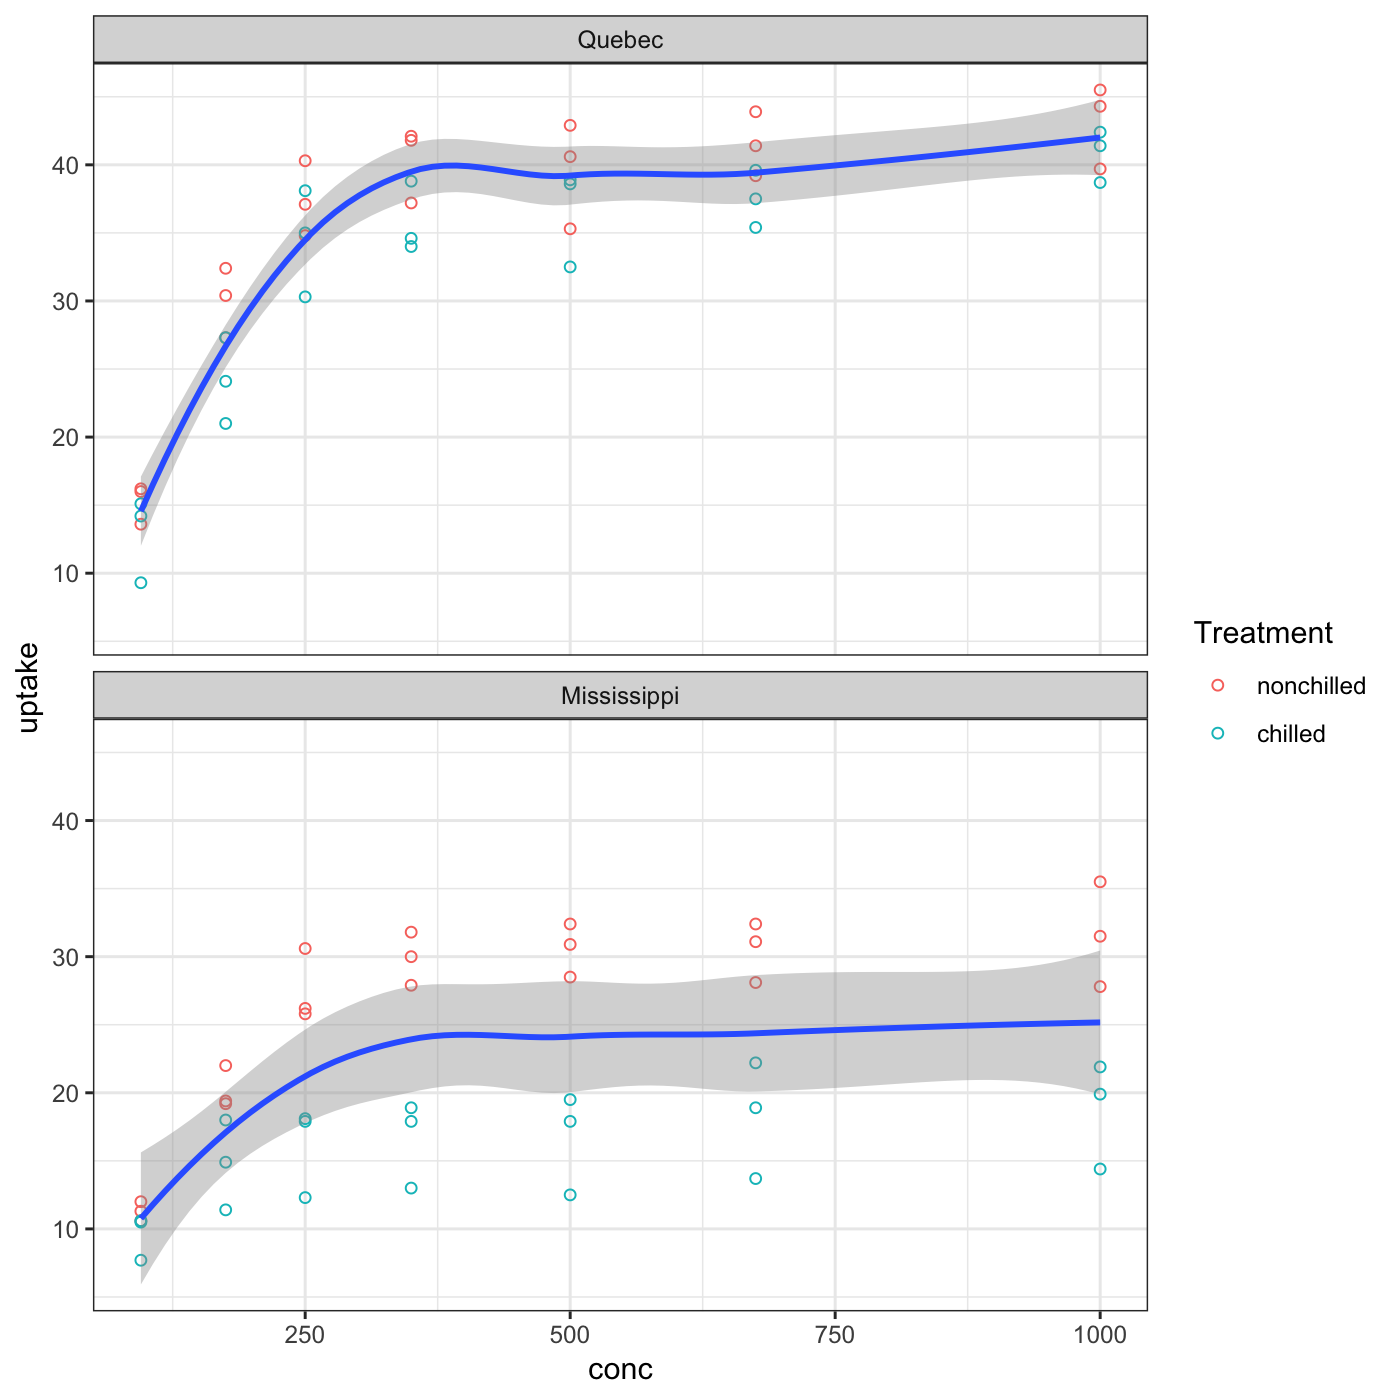

In [12]:
ggplot(data = CO2, mapping = aes(x=conc,y=uptake)) +
    geom_point(mapping = aes(color=Treatment), shape=1) +
    geom_smooth() +
    facet_wrap(~Type, ncol=1) +
    theme_bw()

## Important arguments/functions to know

### Geometries

`geom_point()` <br>
`geom_boxplot()` <br>
`geom_bar()` <br>
`geom_histogram()` <br>
`geom_smooth()` <br>
`geom_density()` <br>
`geom_text()` <br>
`geom_label()` <br>
`geom_line()`

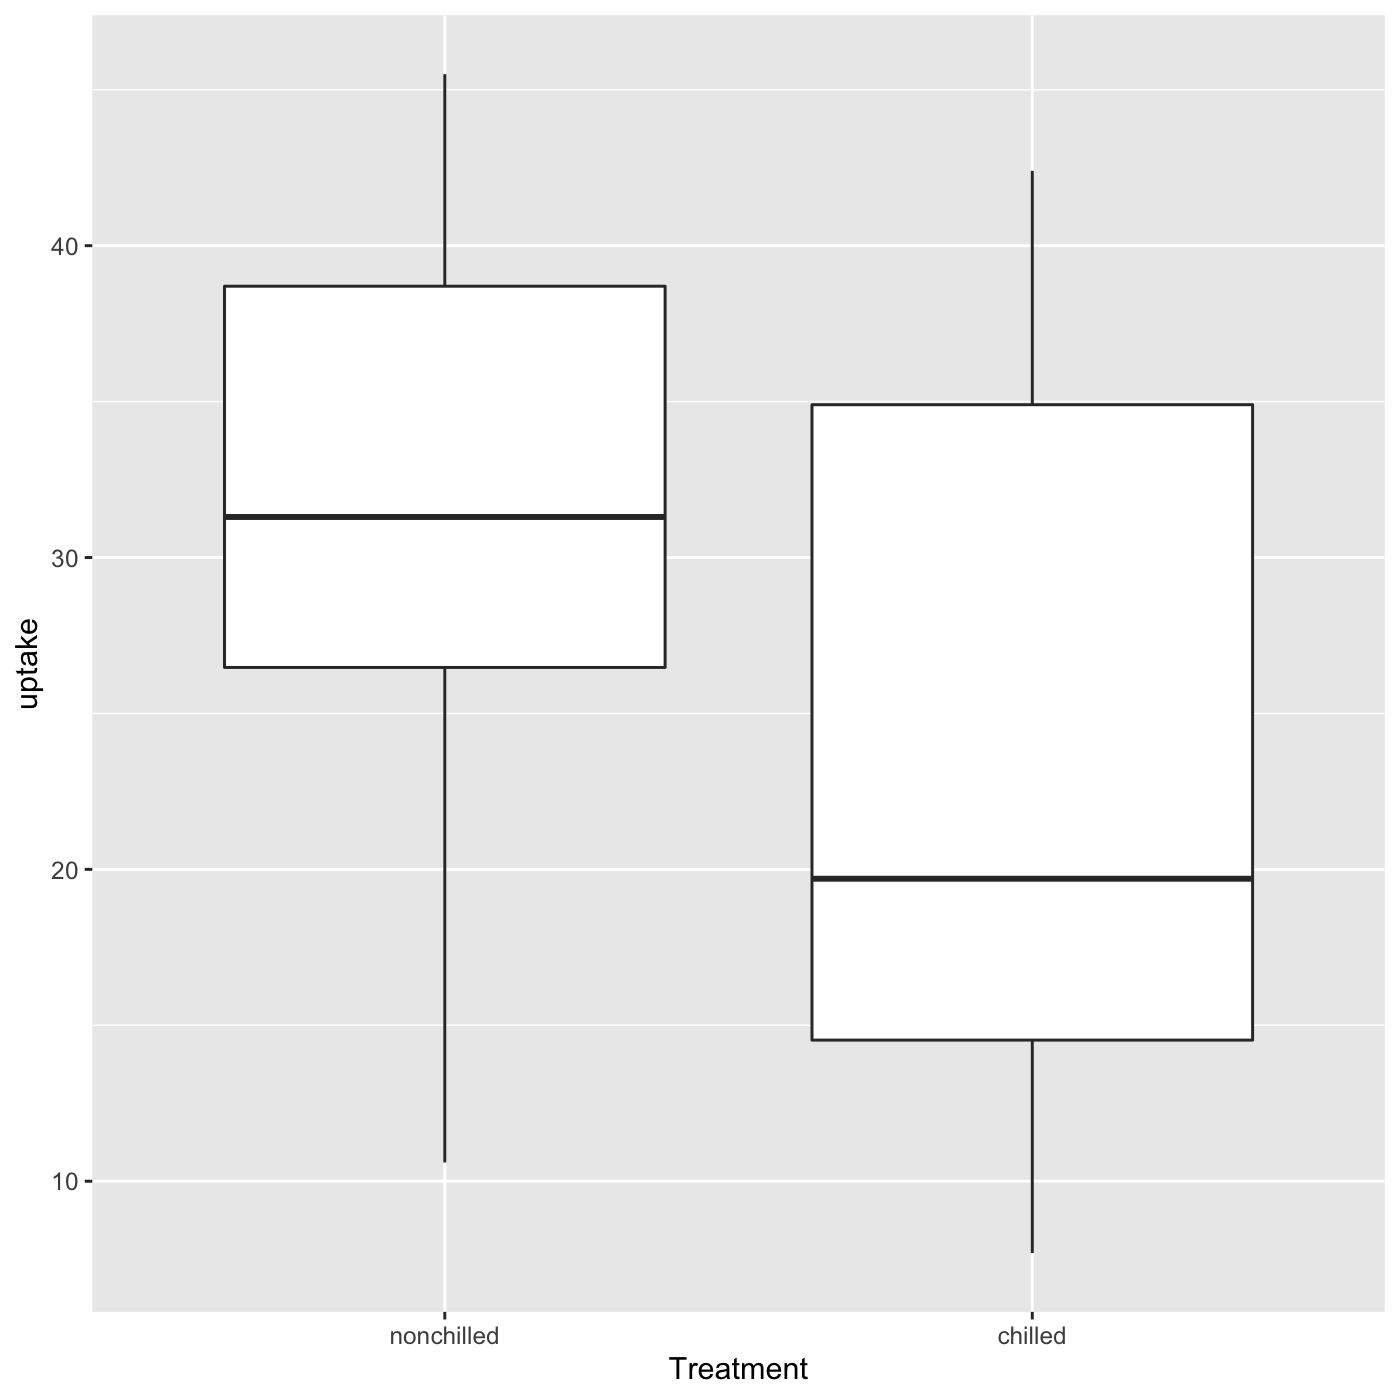

In [13]:
ggplot(data = CO2) +
    geom_boxplot(mapping = aes(x=Treatment, y=uptake))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



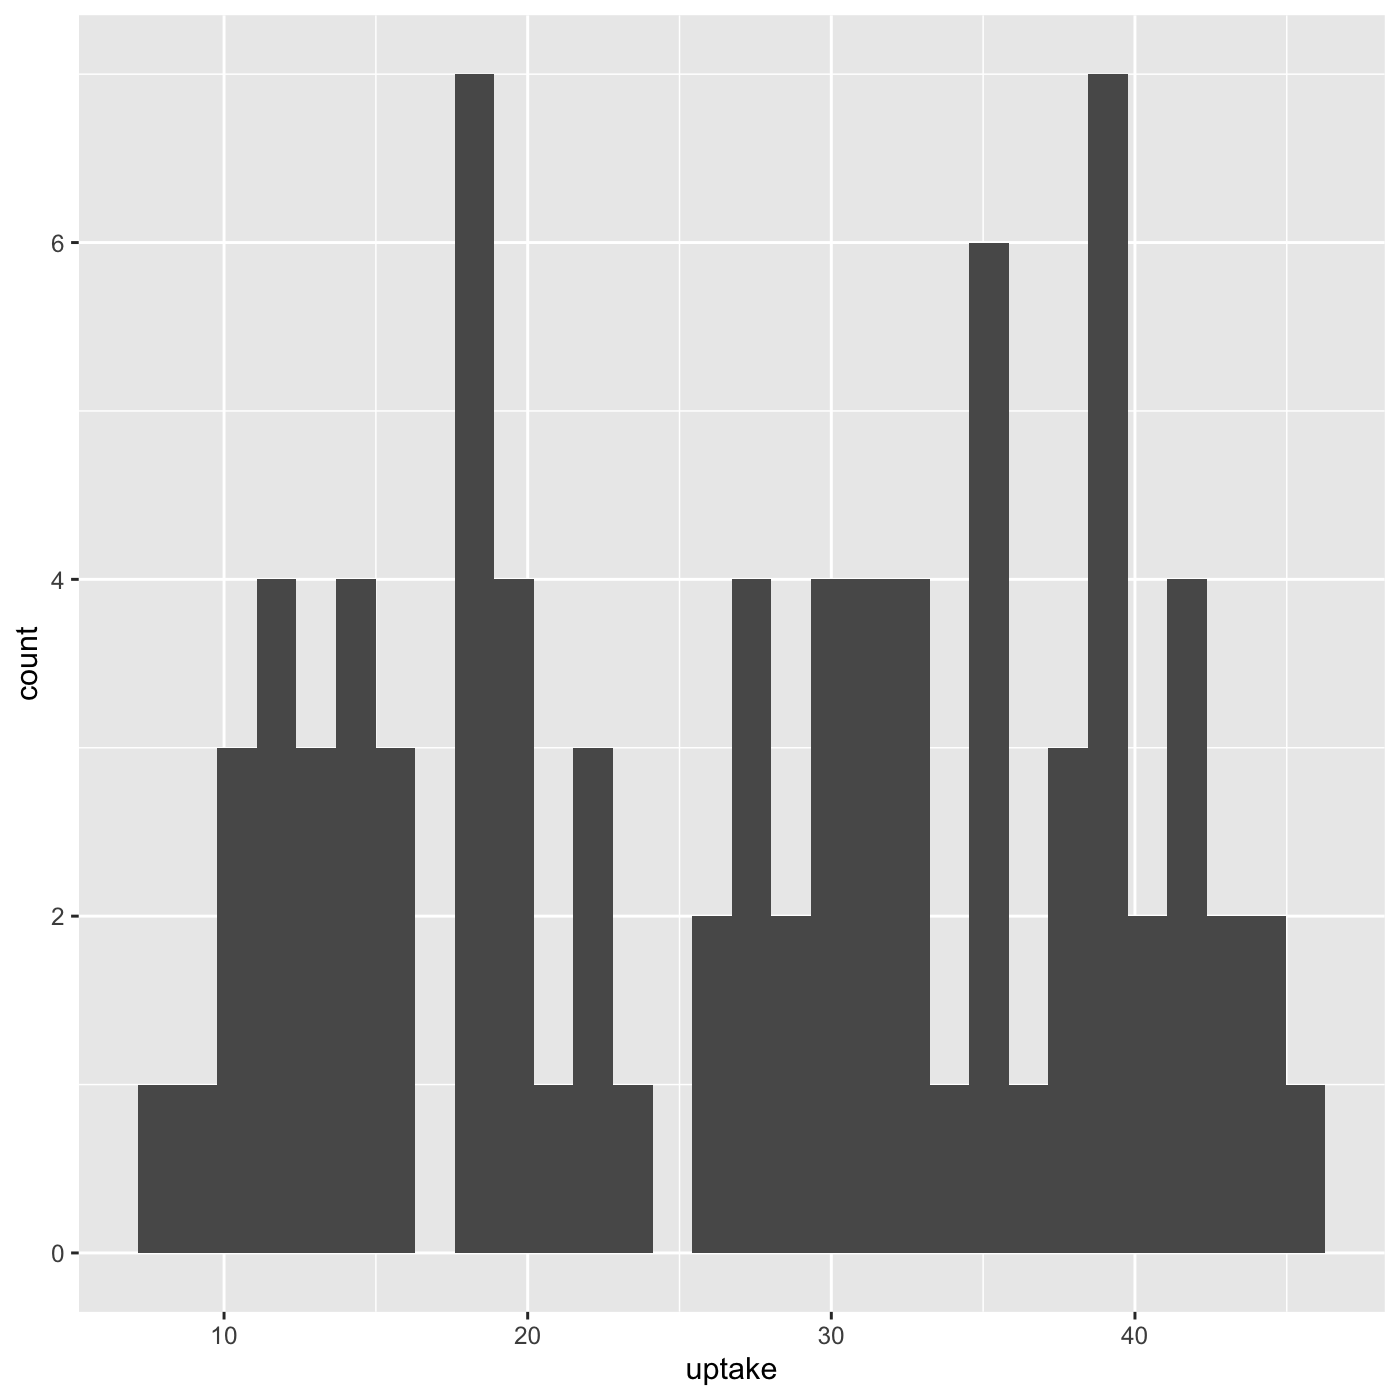

In [14]:
ggplot(CO2) +
    geom_histogram(aes(x=uptake))

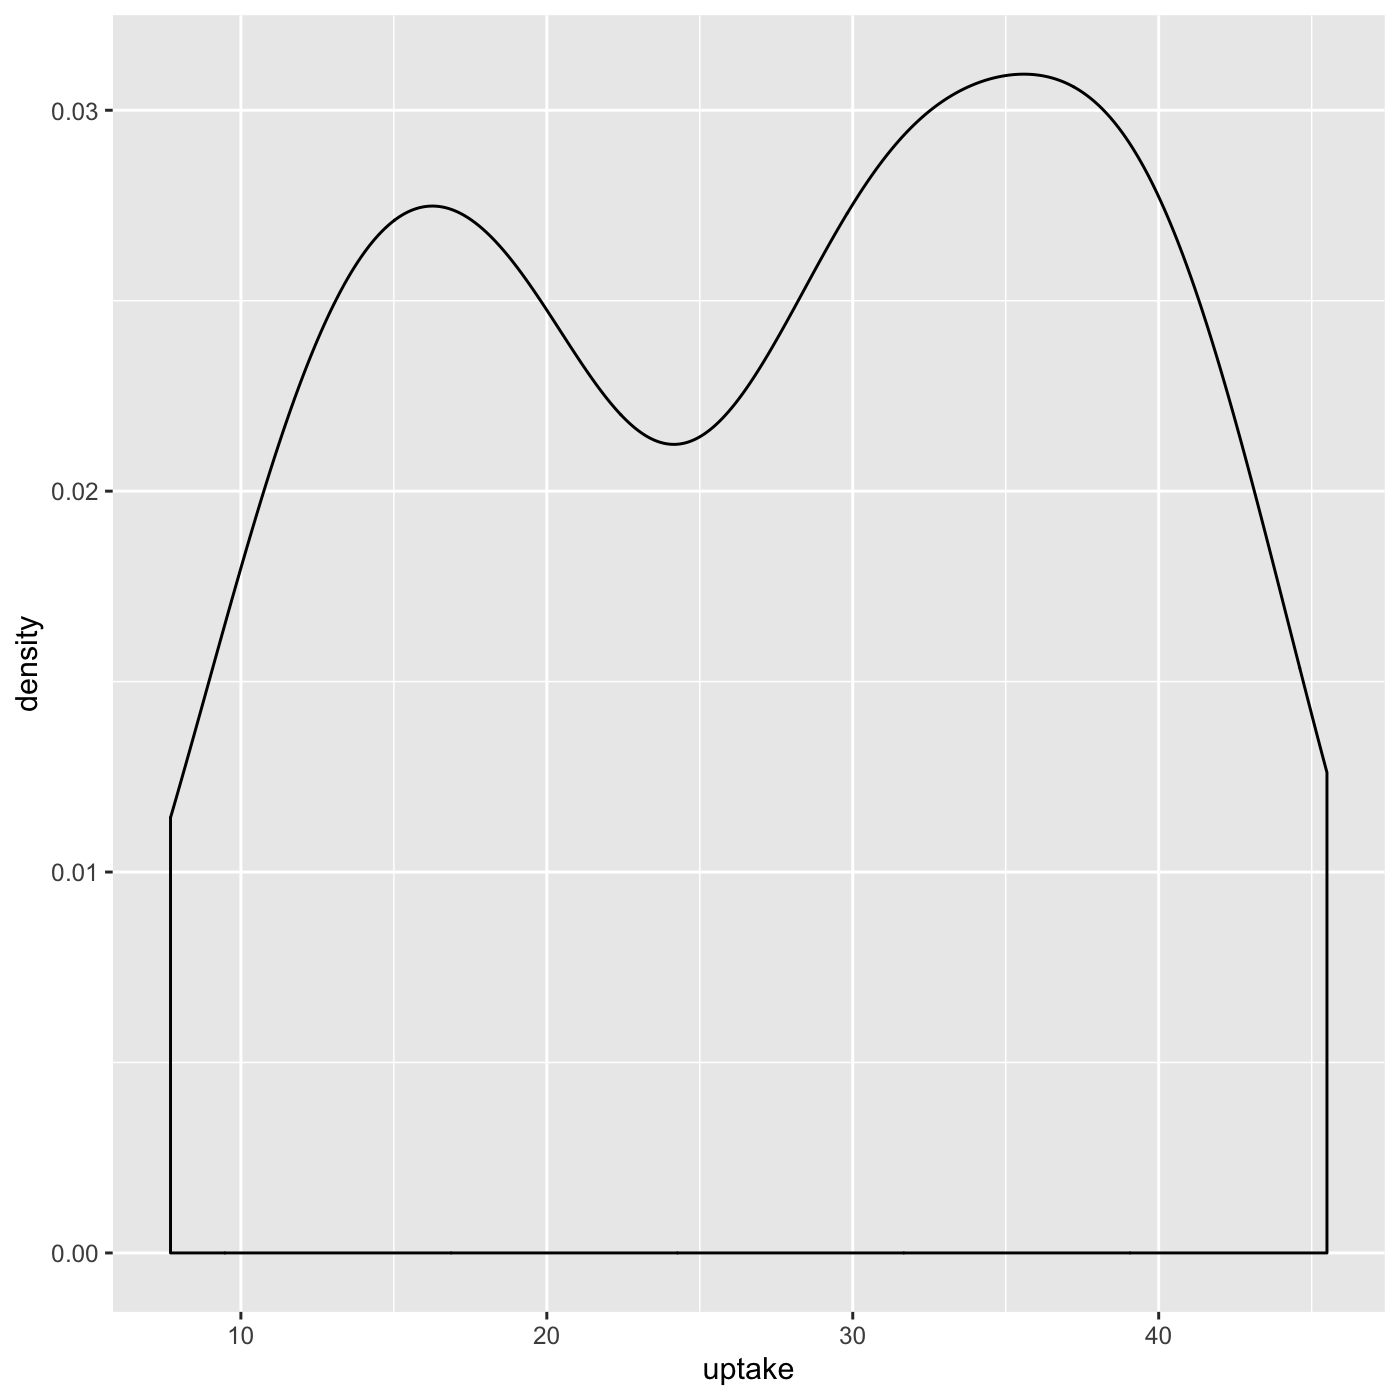

In [15]:
ggplot(CO2) +
    geom_density(aes(x=uptake))

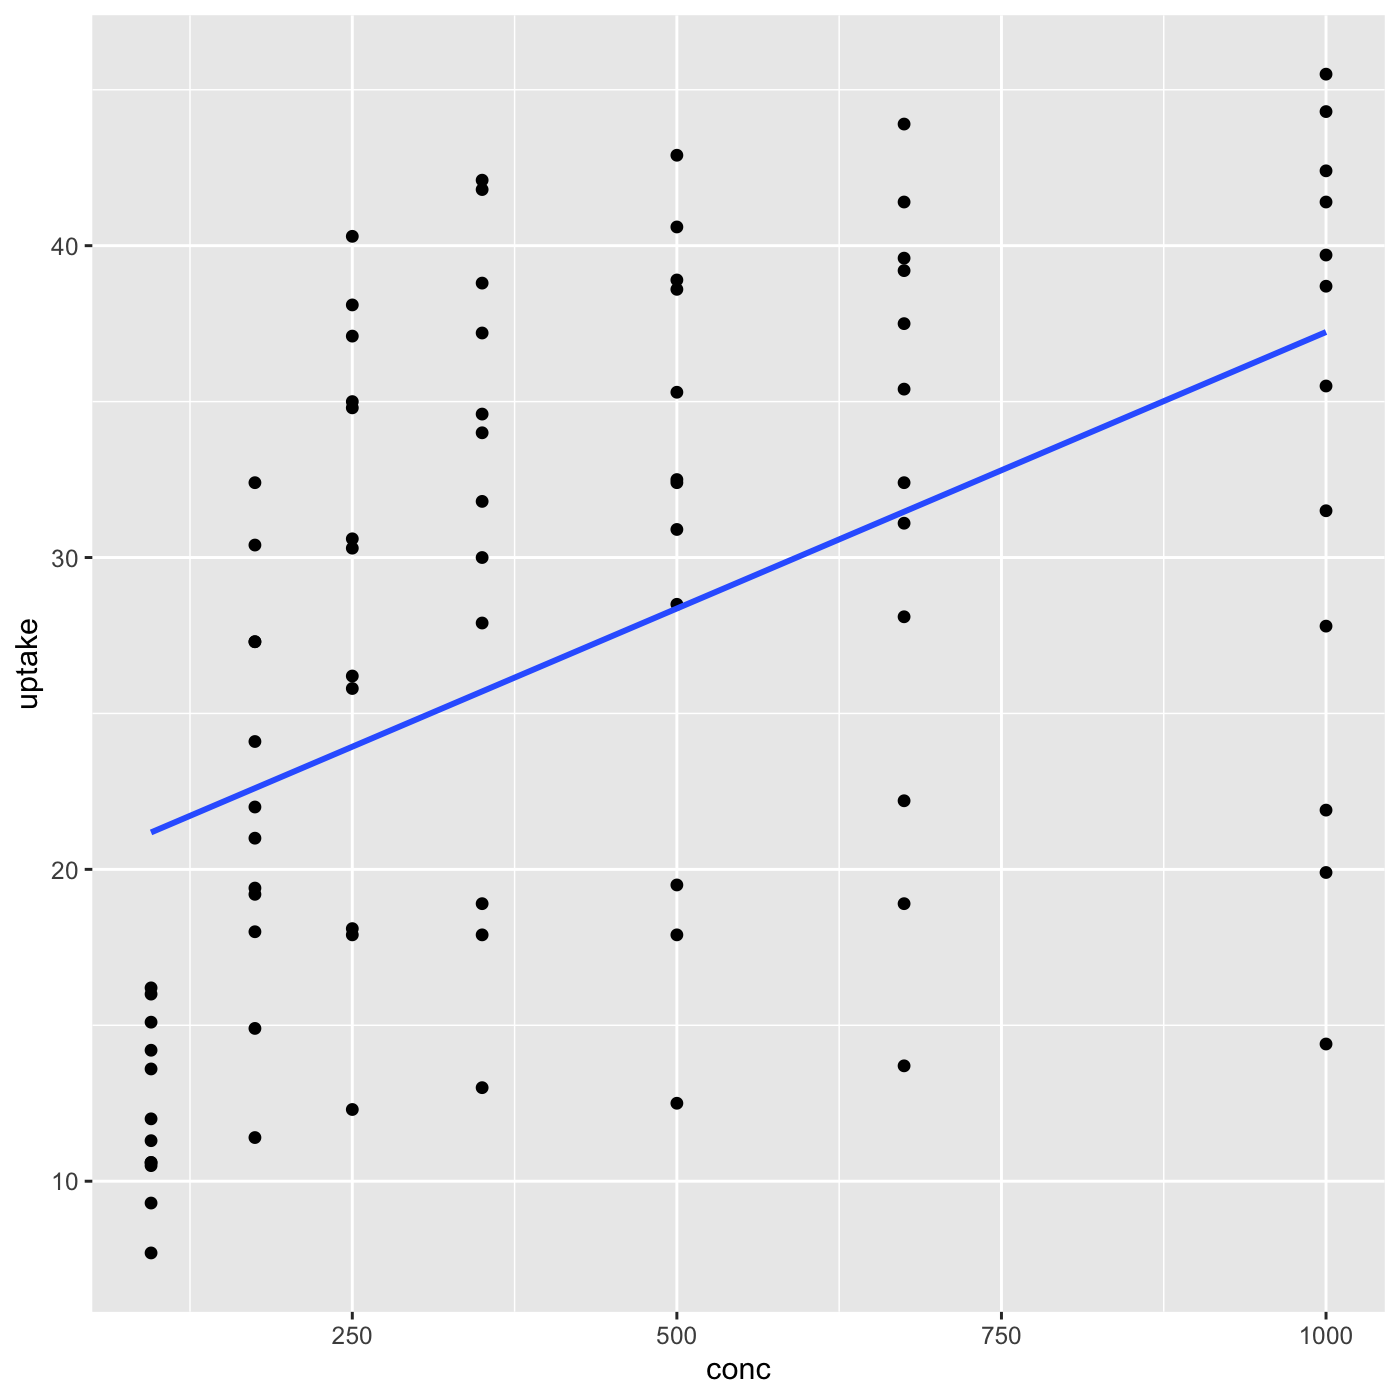

In [16]:
ggplot(CO2, aes(x=conc, y=uptake)) +
    geom_point() +
    geom_smooth(method='lm', se=F)

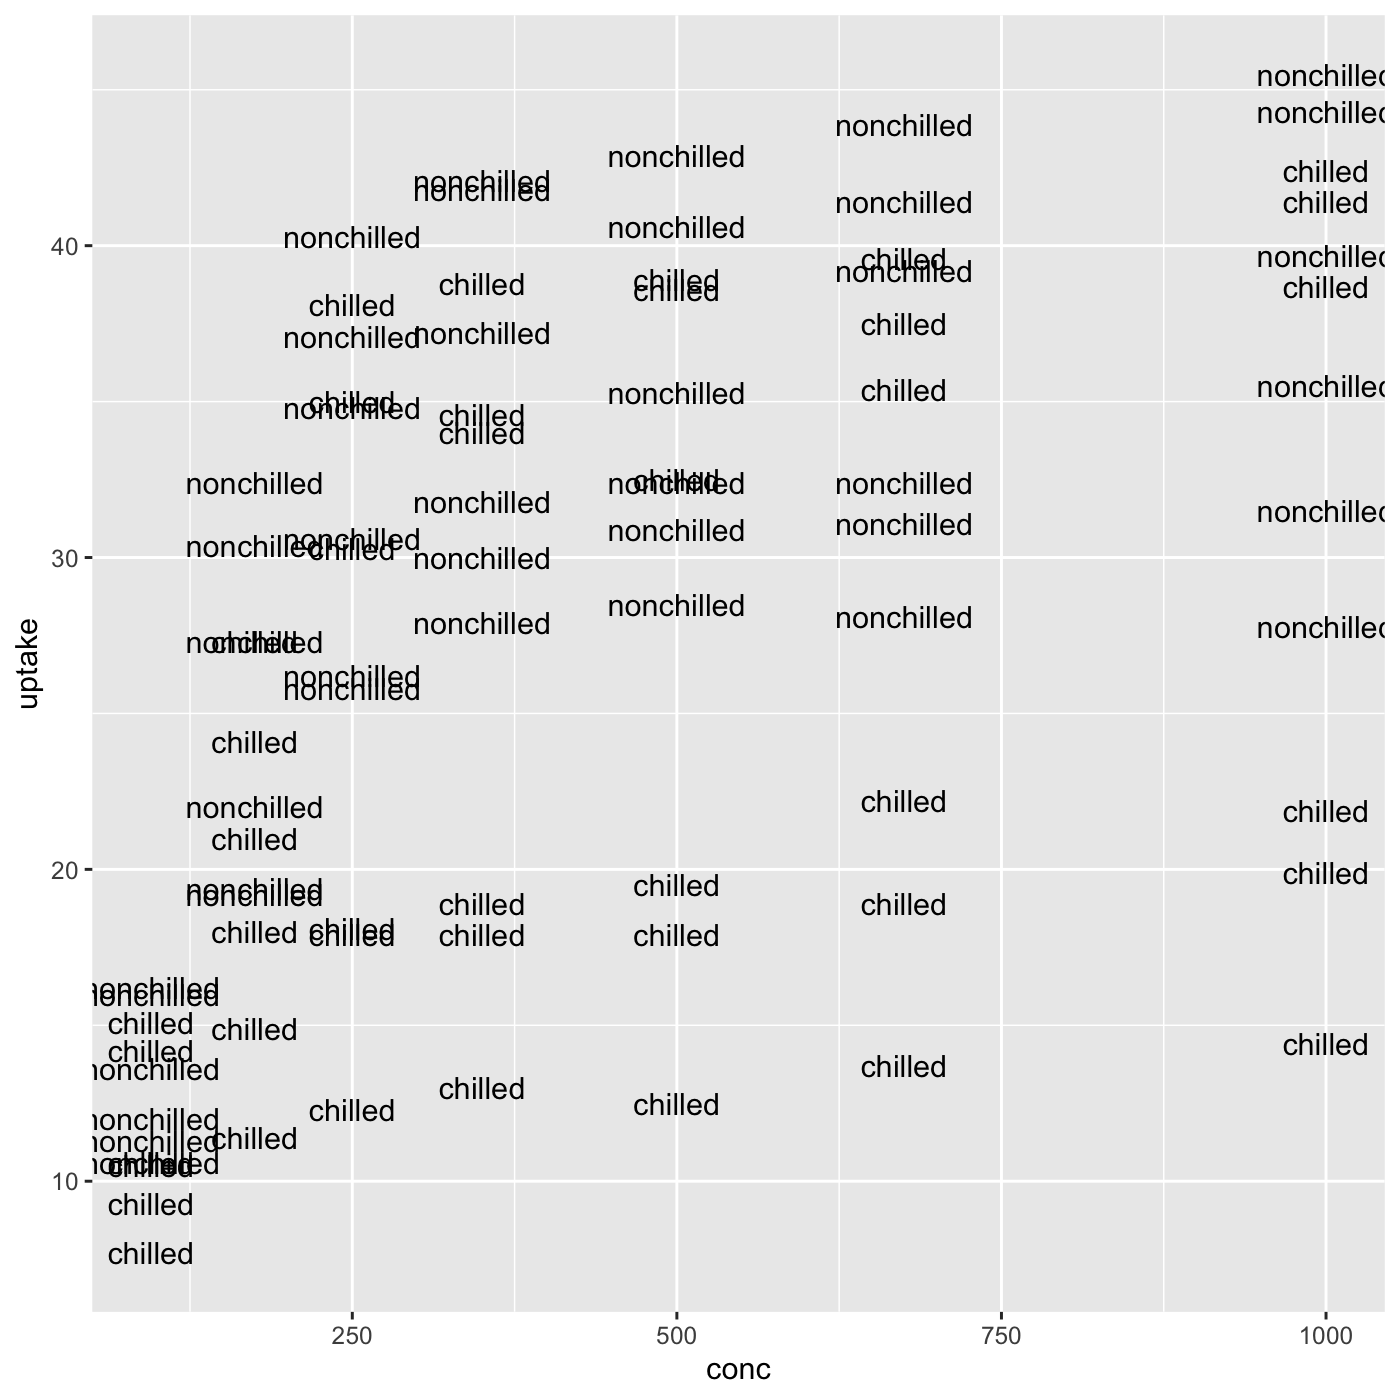

In [17]:
ggplot(CO2,aes(x=conc, y=uptake)) +
    geom_text(aes(label=Treatment))

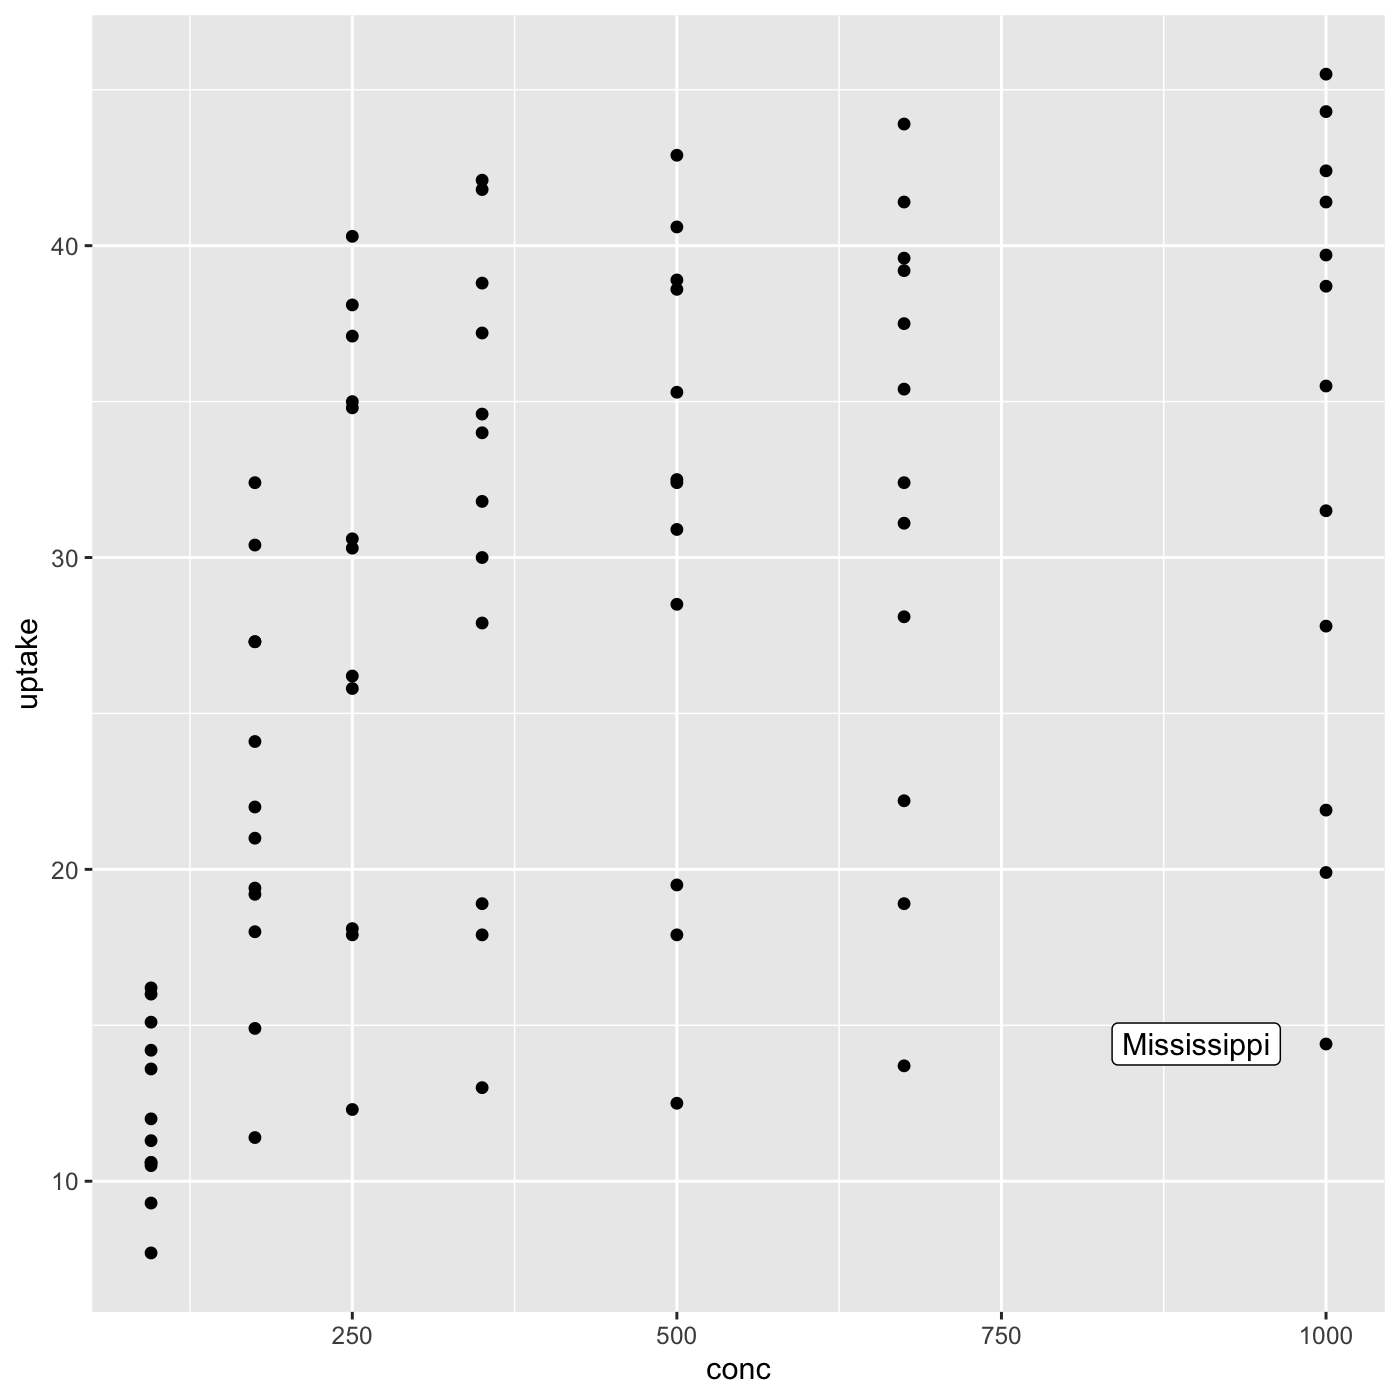

In [18]:
ggplot(CO2) + 
    geom_point(aes(x=conc, y=uptake)) +
    geom_label(data=filter(CO2,conc>750,uptake<15),mapping=aes(label=Type,
                                                   y=uptake,x = conc-100))

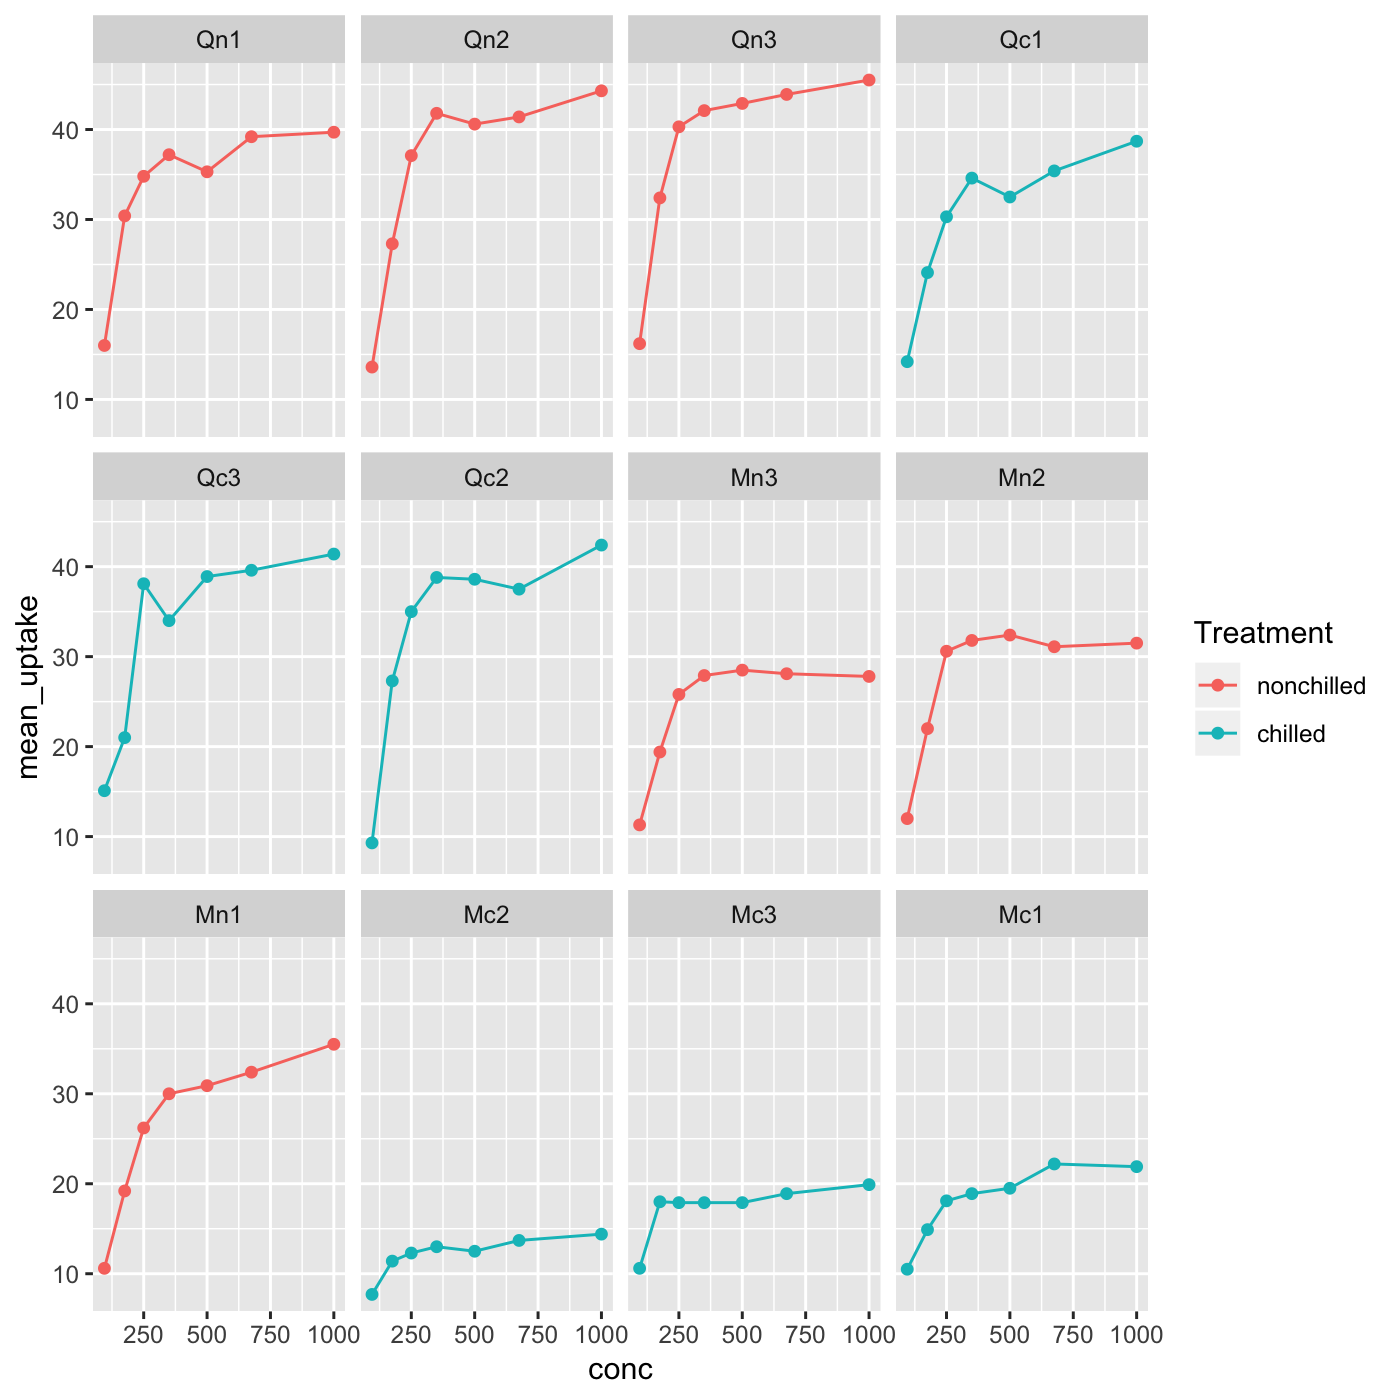

In [19]:
group_by(CO2,Plant,Type, Treatment,uptake,conc) %>%
    summarize(mean_uptake=mean(uptake)) %>%
    ggplot(aes(x=conc,y=mean_uptake, color=Treatment)) +
    geom_point() +
    geom_line() + 
    facet_wrap(~Plant)

### Aesthetics
* `x`,`y`
* `size`
* `label`
* `group`
* `color`, `fill`

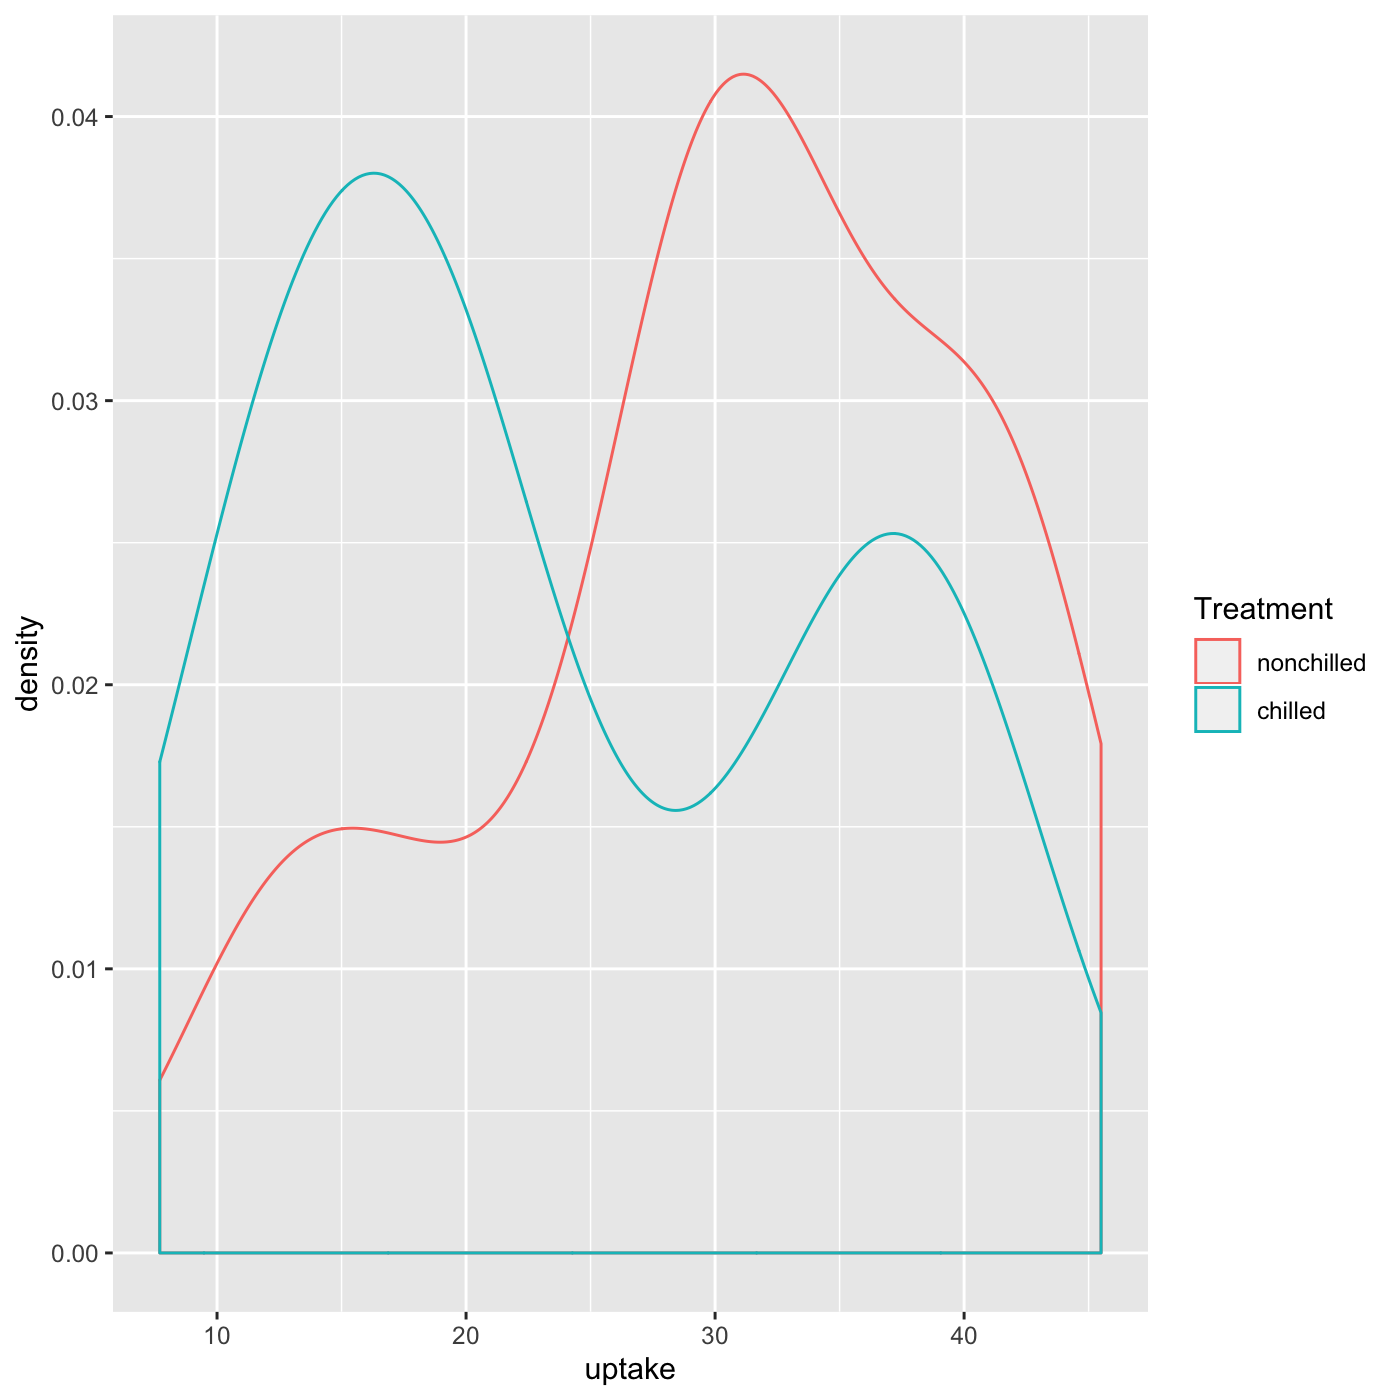

In [20]:
ggplot(CO2) +
    geom_density(aes(color=Treatment, x=uptake))

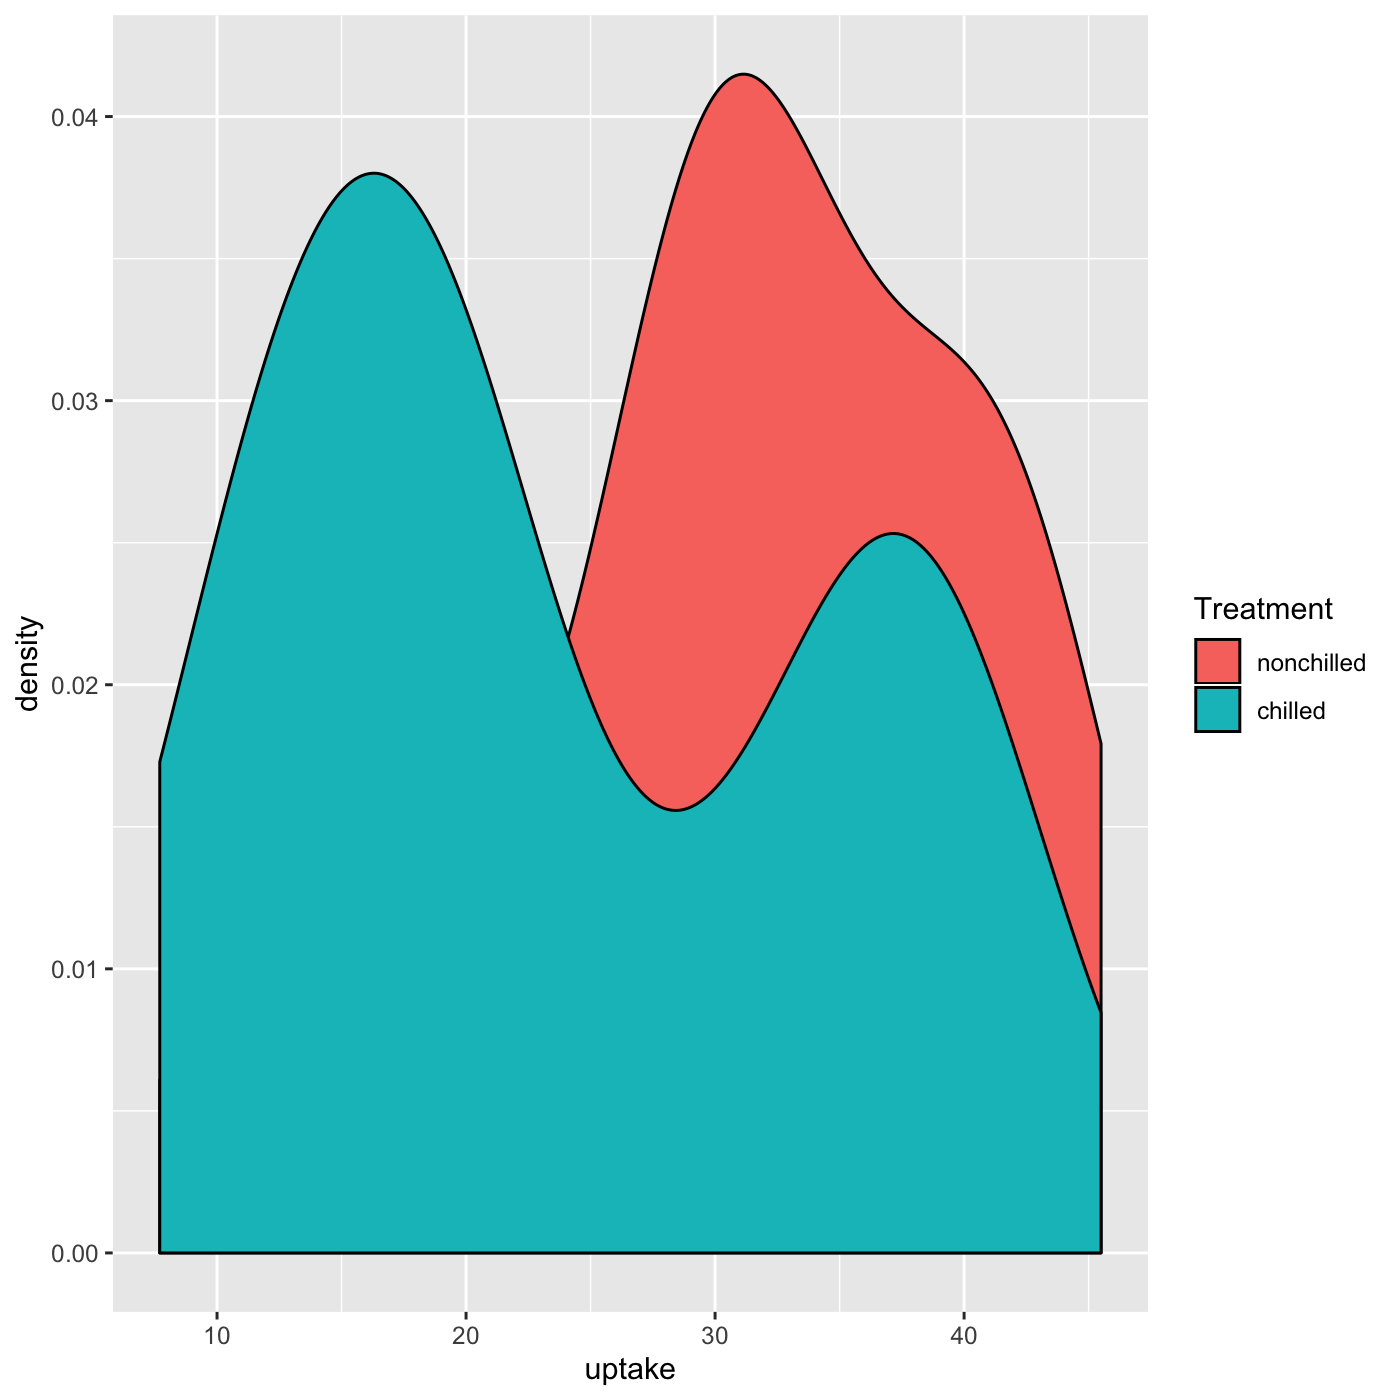

In [21]:
ggplot(CO2) +
    geom_density(aes(fill=Treatment, x=uptake))


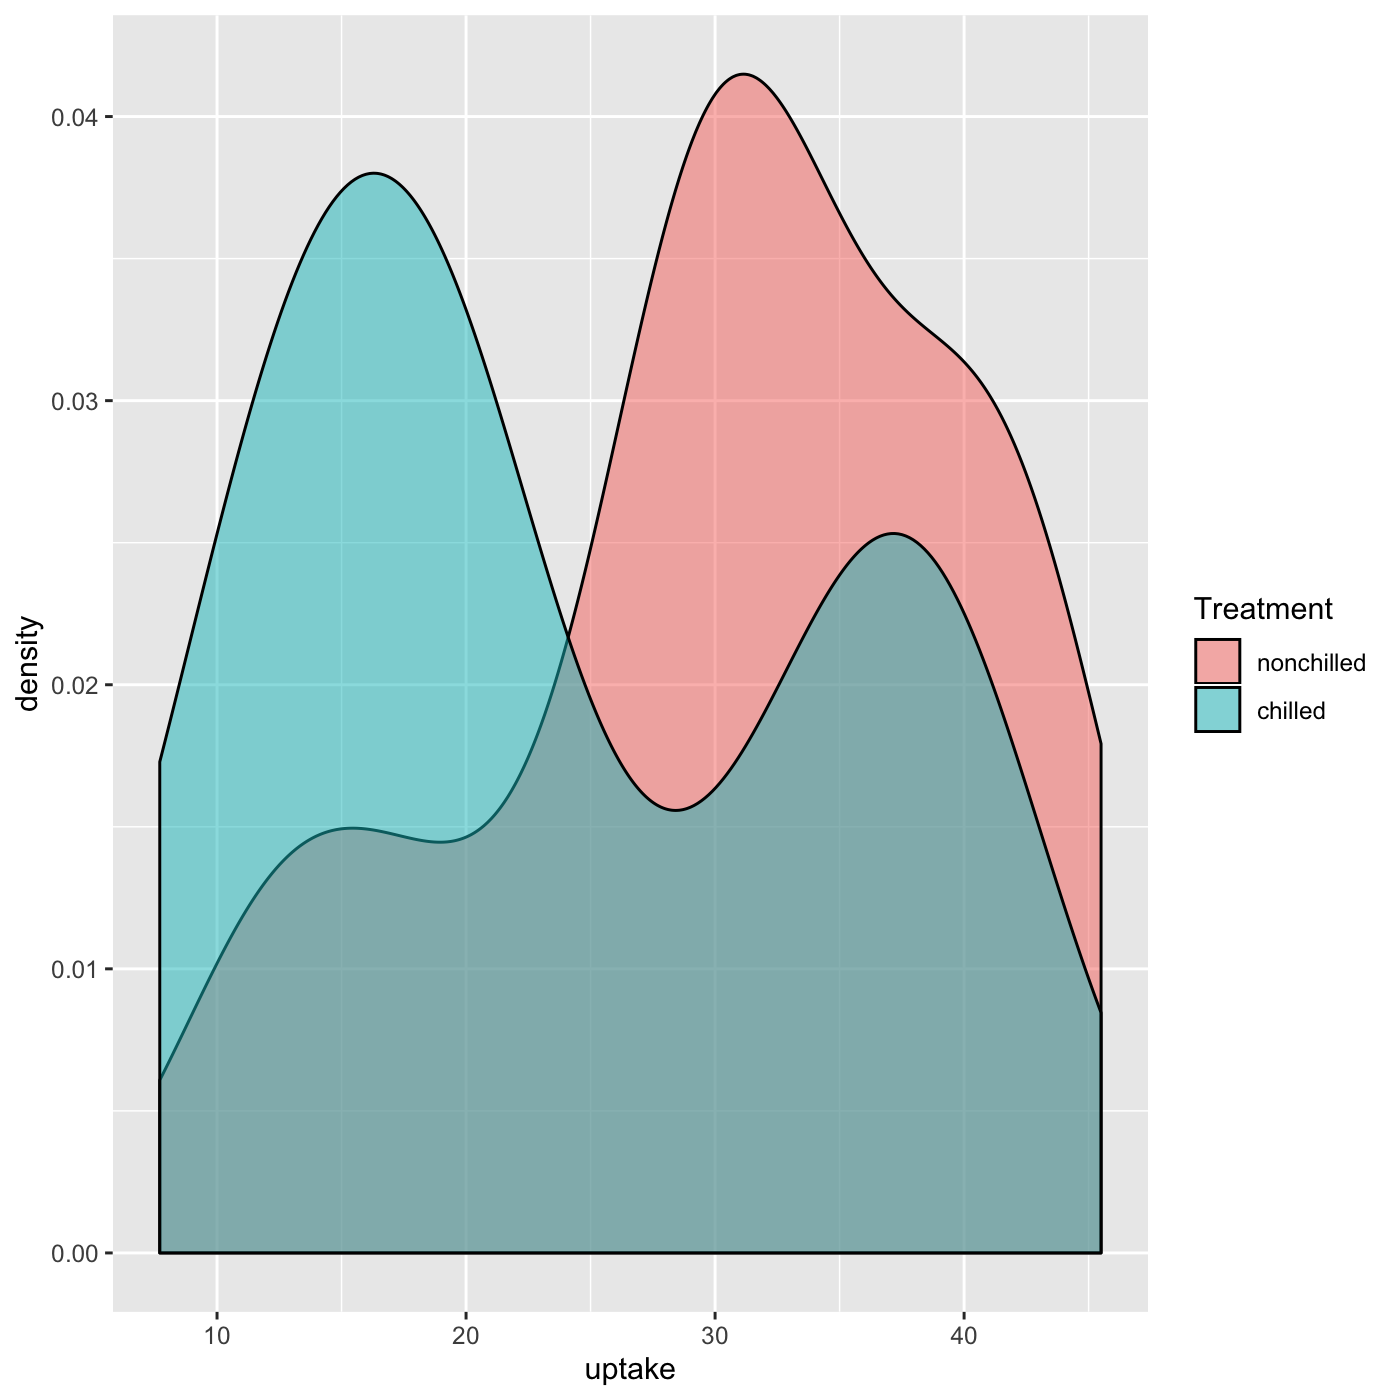

In [22]:
ggplot(CO2) +
    geom_density(aes(fill=Treatment, x=uptake), alpha = 0.5)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



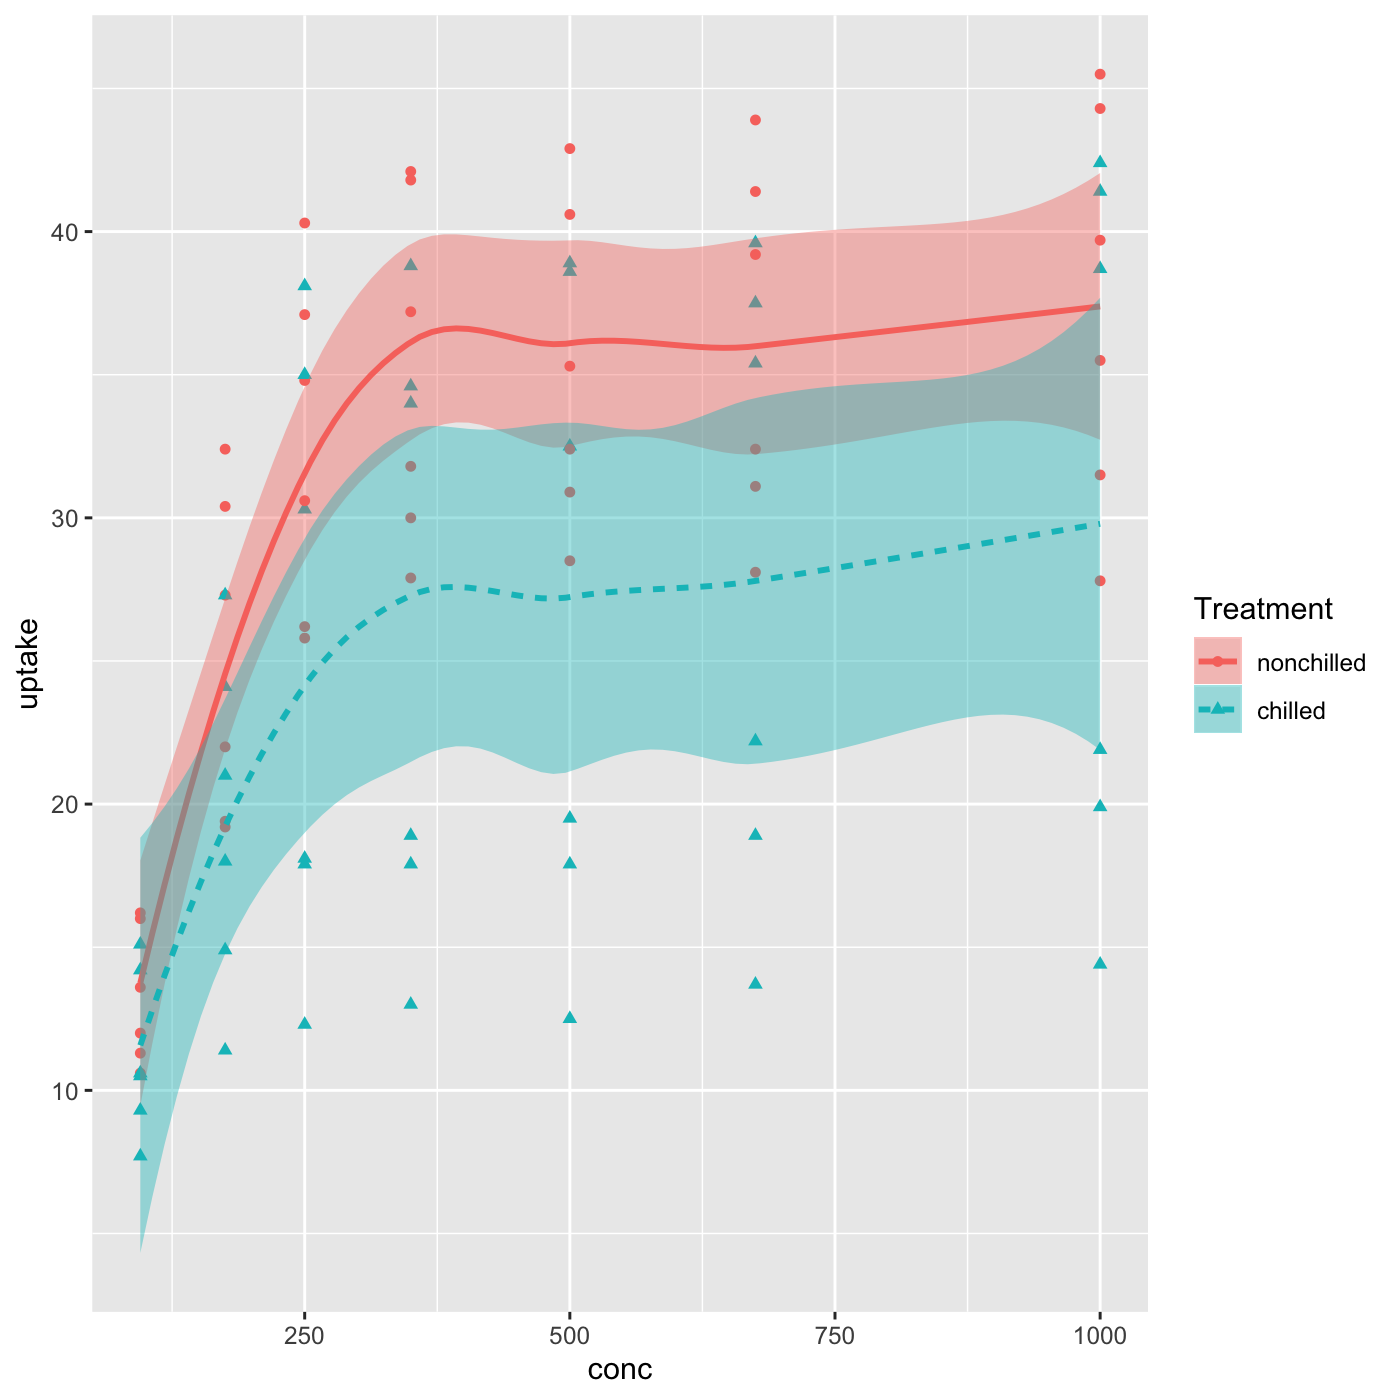

In [23]:
ggplot(CO2, aes(x=conc, y=uptake, color=Treatment, shape=Treatment)) +
    geom_point() +
    geom_smooth(aes(linetype=Treatment, fill=Treatment))

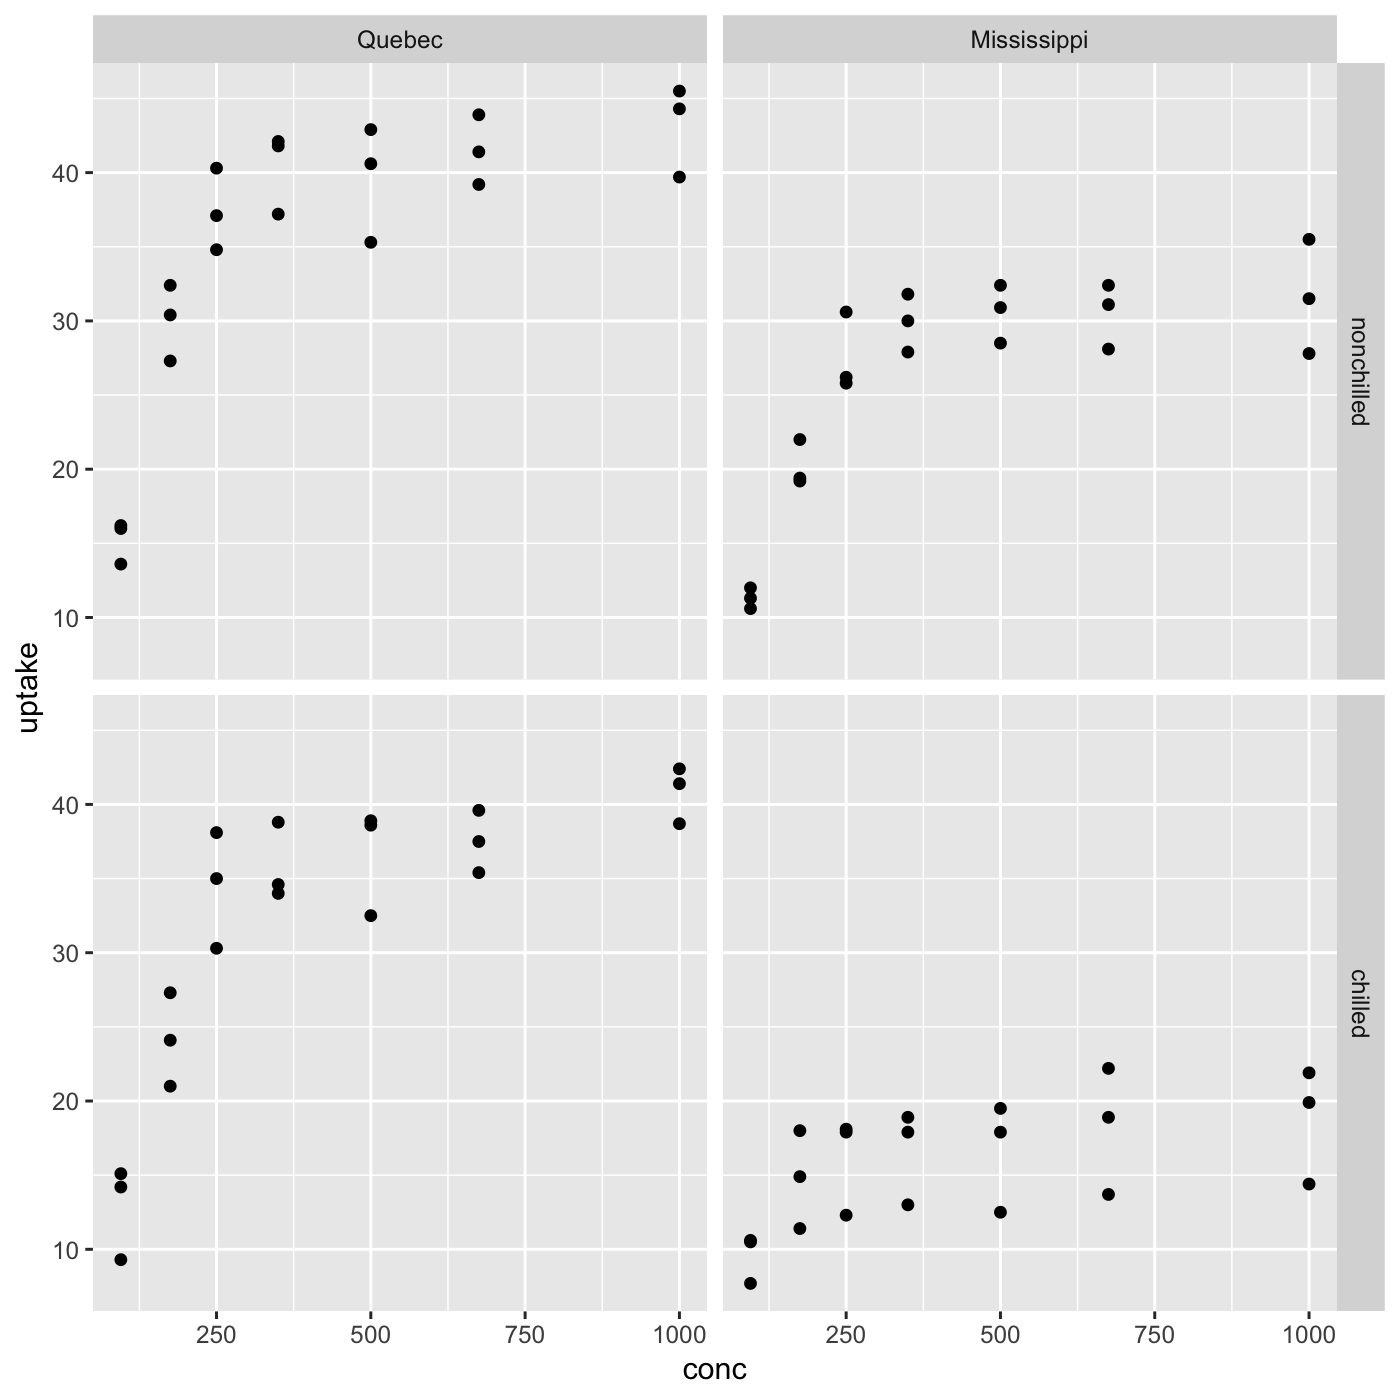

In [24]:
ggplot(CO2, aes(x=conc, y=uptake)) +
    geom_point()+
    facet_grid(Treatment~Type)